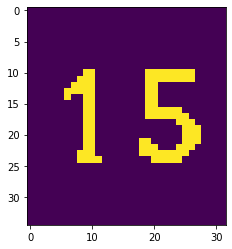

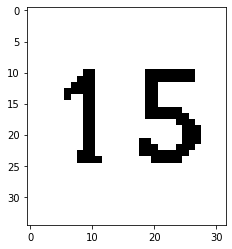

15



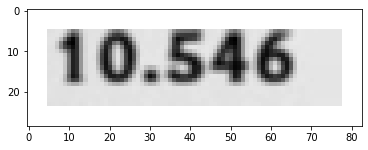

10546



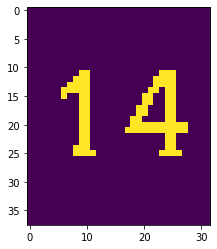

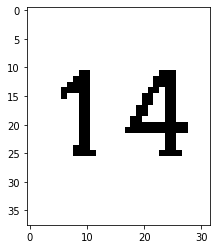

14



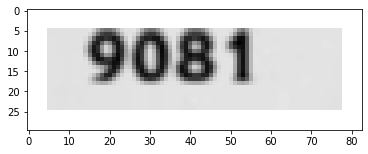

9081



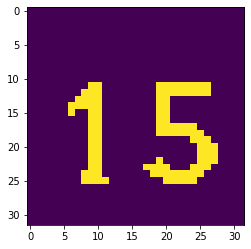

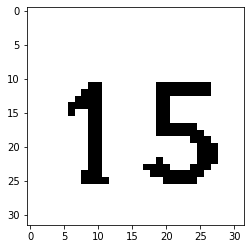

15



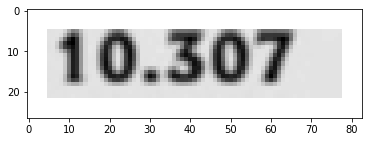

10307



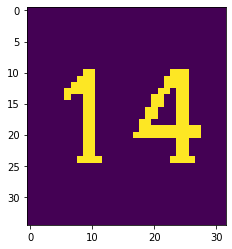

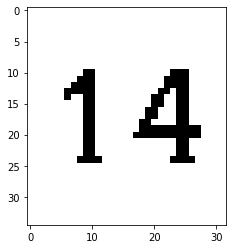

14



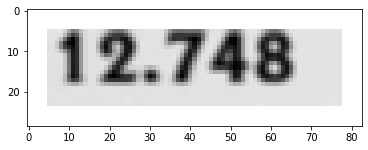

12748



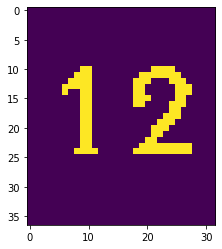

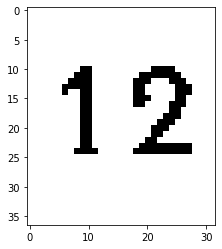

12



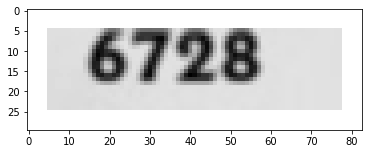

6728



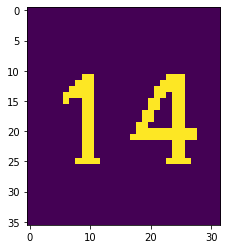

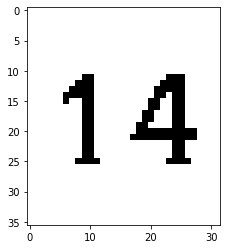

14



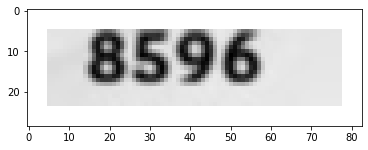

8596



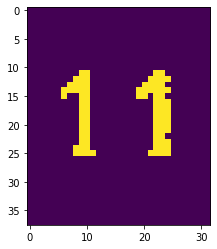

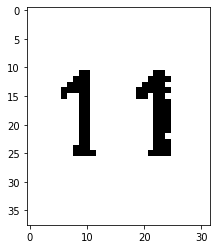

11



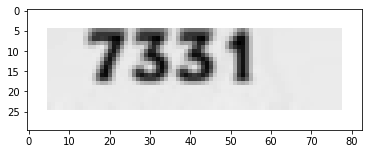

7331



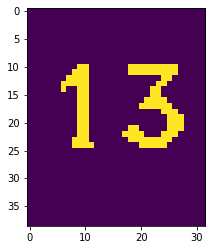

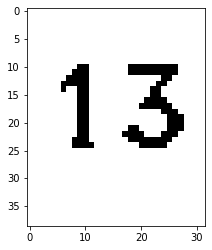

13



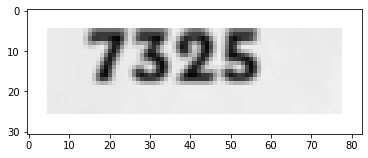

7325



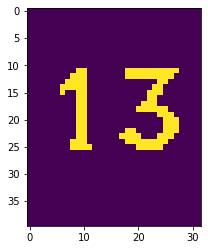

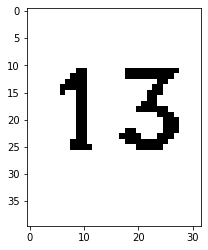

13



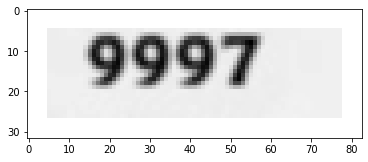

9997



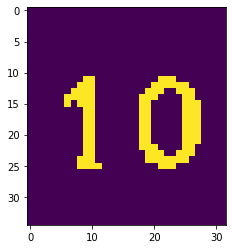

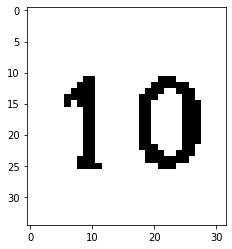

10



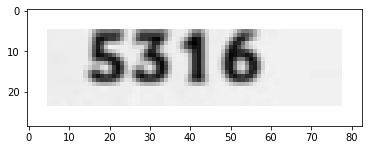

5316



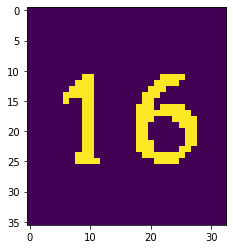

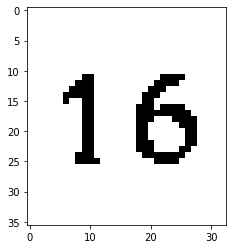

16



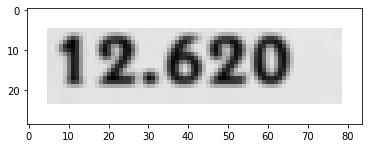

12620



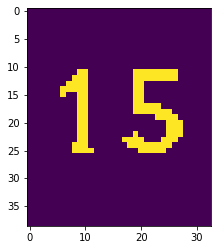

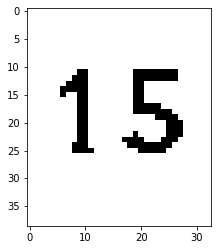

15



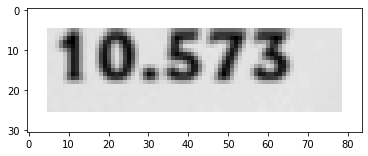

10573



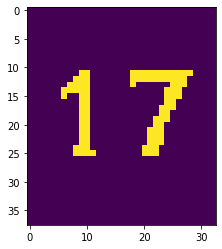

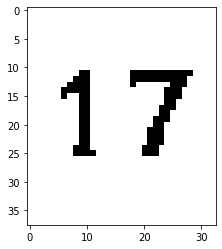

17



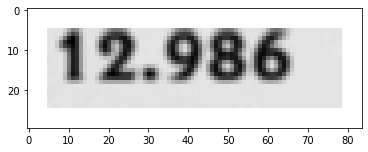

12986



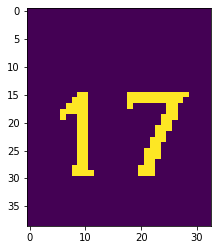

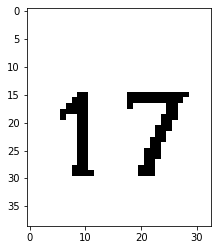

17



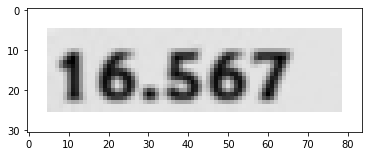

16567



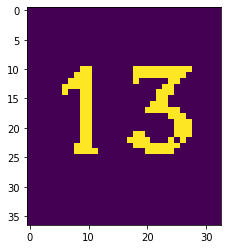

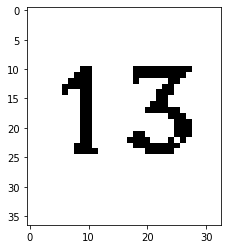

13



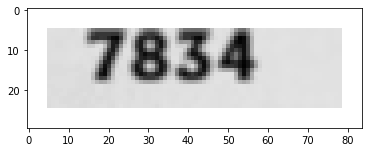

7834



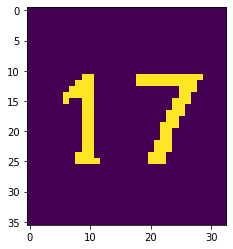

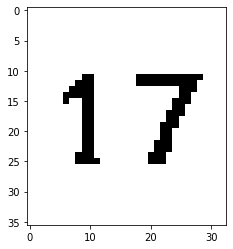

17



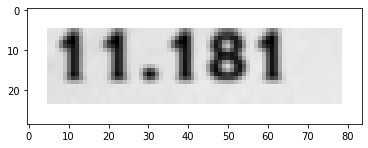

11181



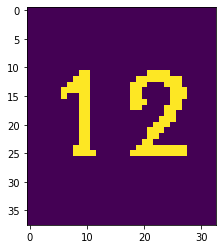

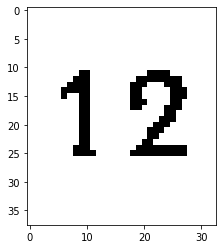

12



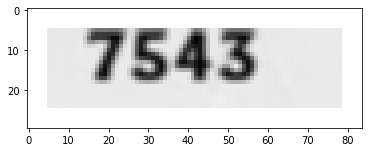

7543



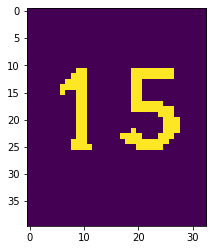

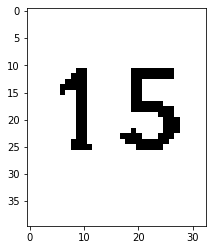

15



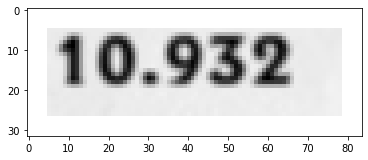

10932



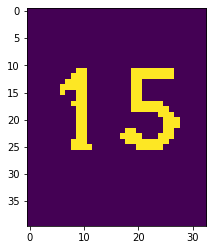

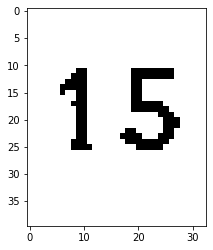

15



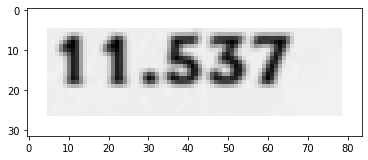

11537



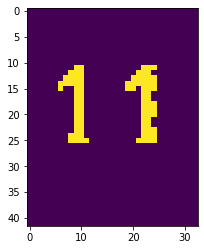

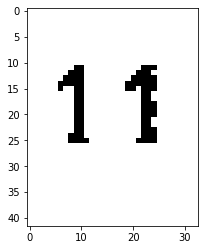

11



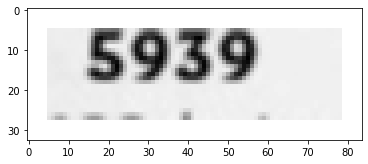

5939



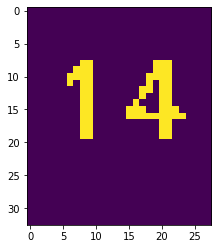

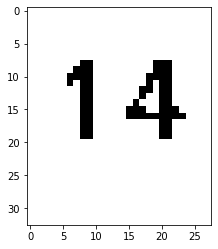

14



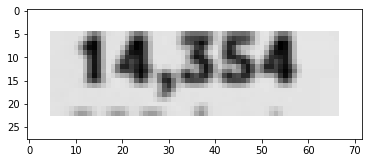

14354



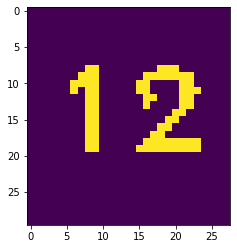

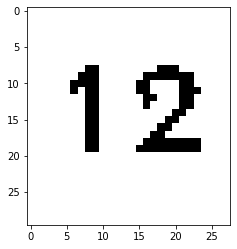

12



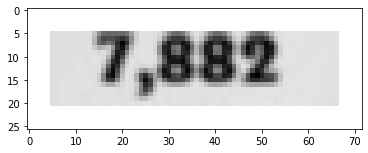

7882



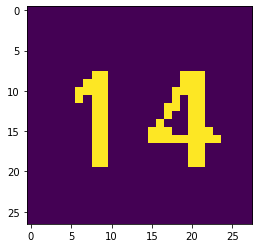

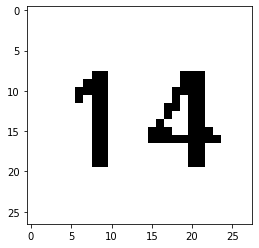

14



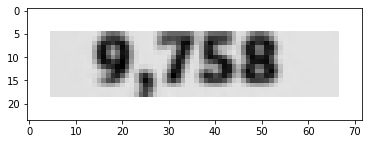

9758



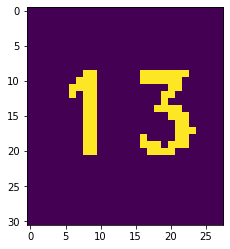

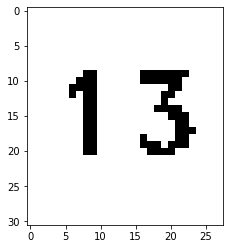

13



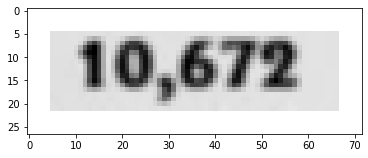

10672



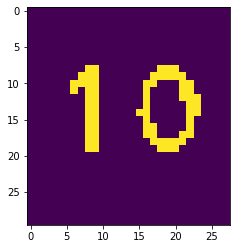

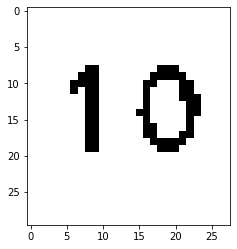

10



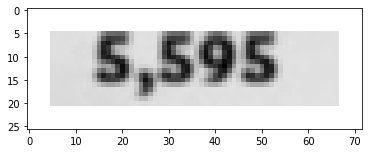

5595



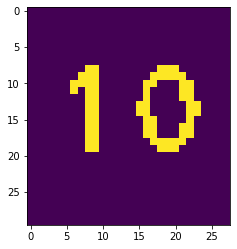

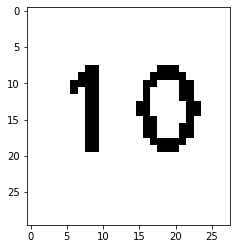

10



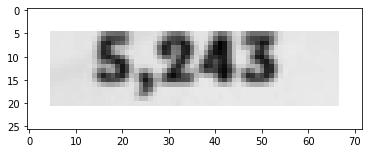

5243



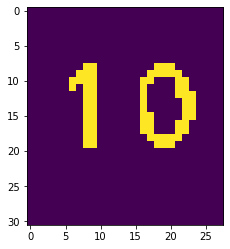

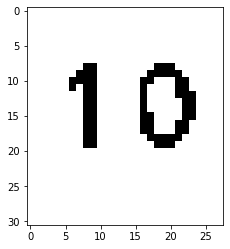

10



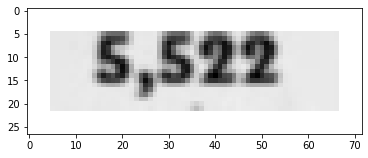

5522



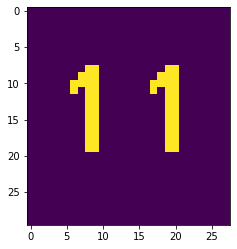

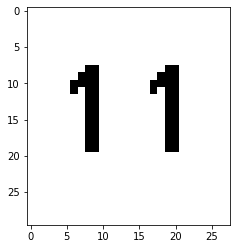

11



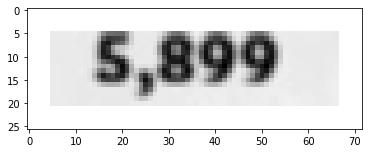

5899



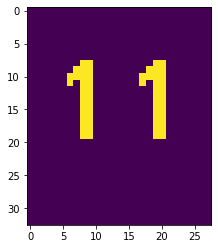

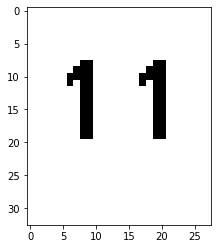

11



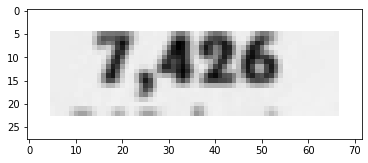

7426



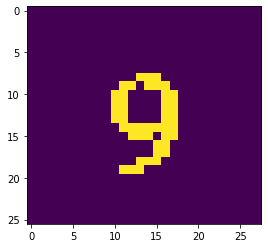

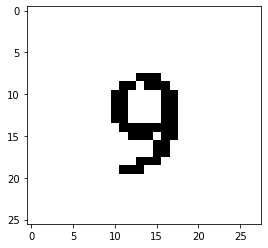

9



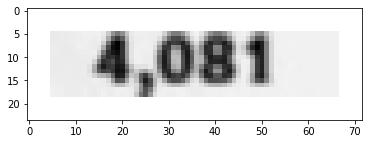

4081



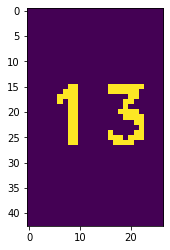

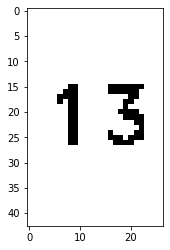

13



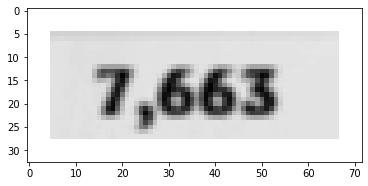

7663



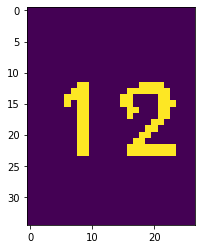

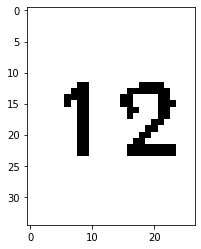

12



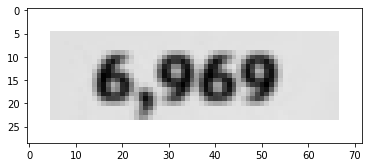

6969



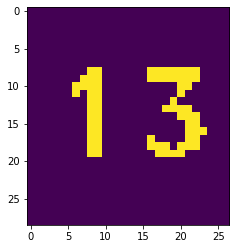

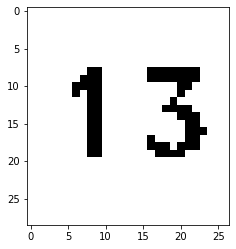

13



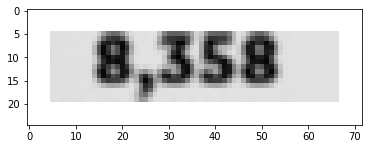

8358



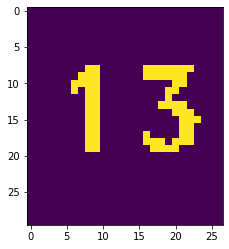

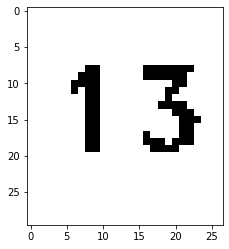

13



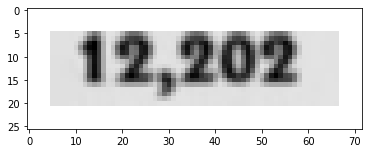

12202



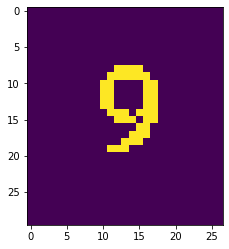

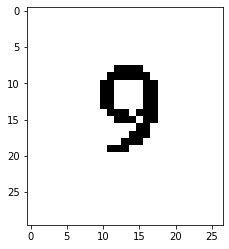

9



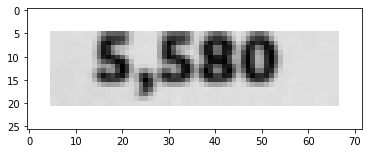

5580



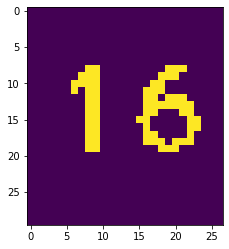

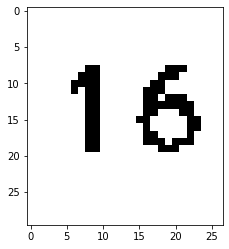

16



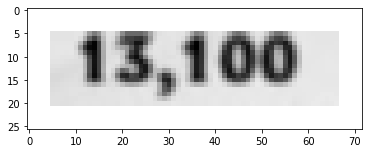

13100



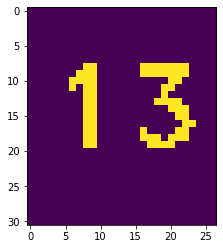

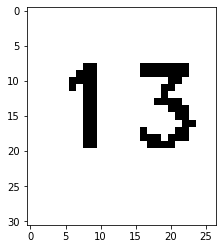

13



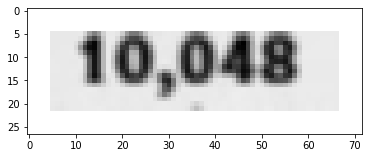

10048



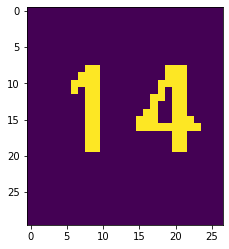

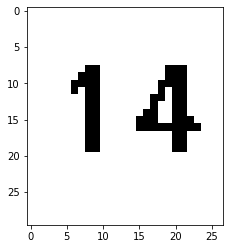

14



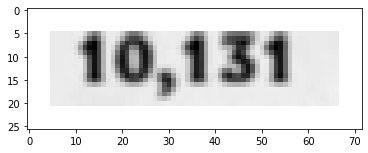

10131



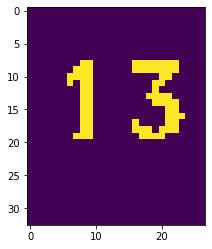

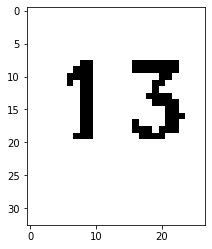

13



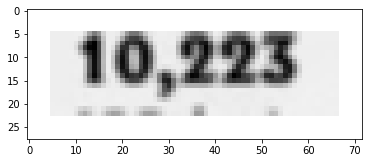

10223



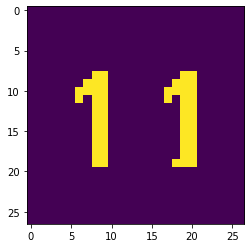

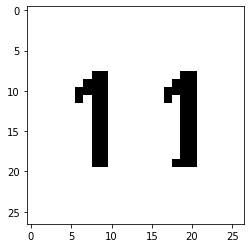

11



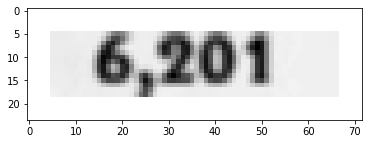

6201



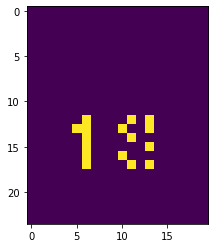

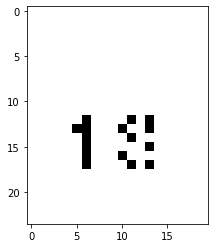

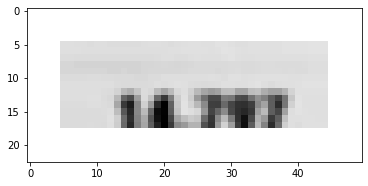

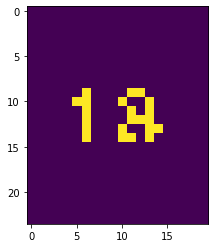

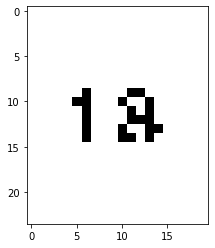

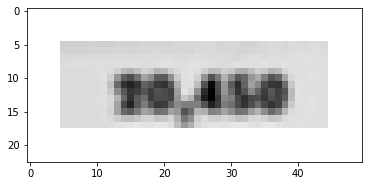

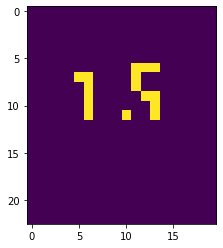

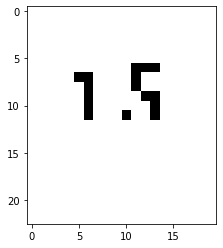

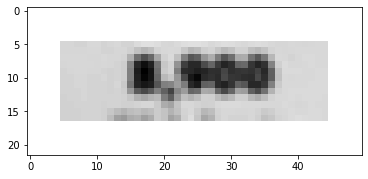

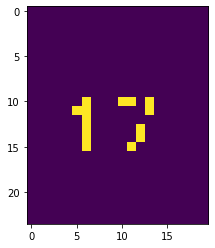

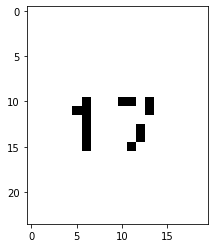

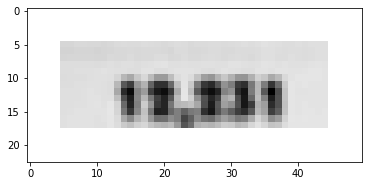

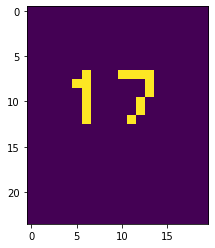

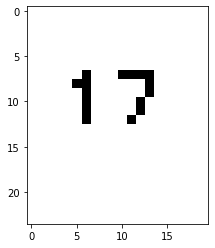

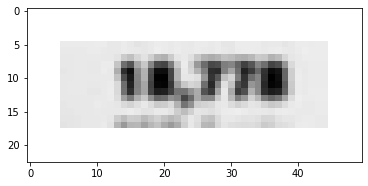

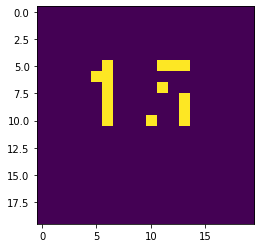

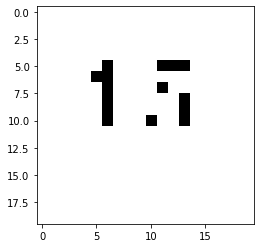

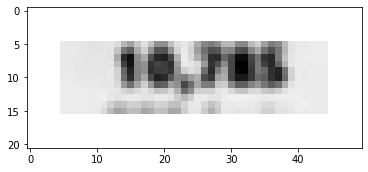

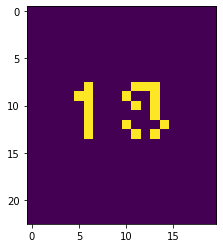

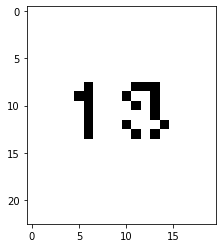

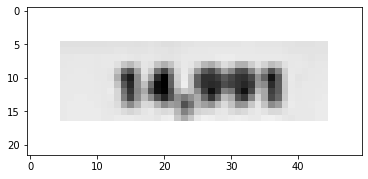

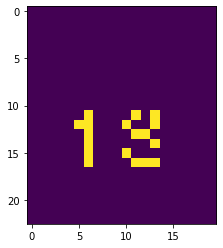

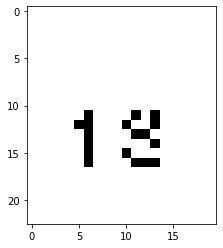

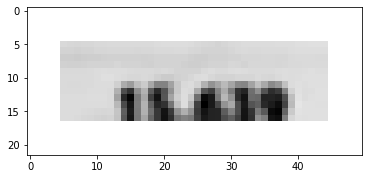

0



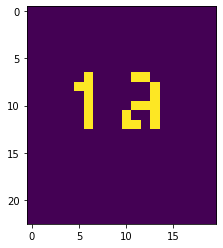

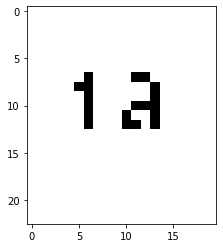

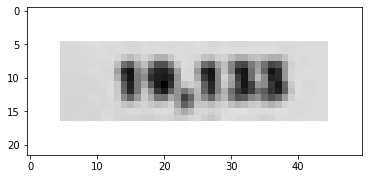

8



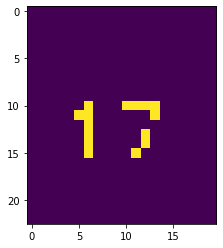

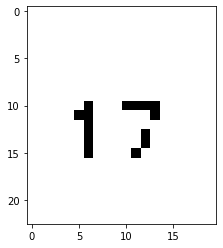

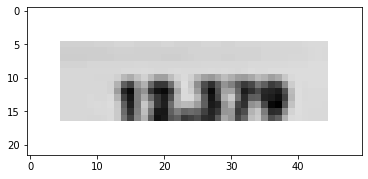

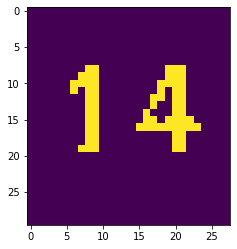

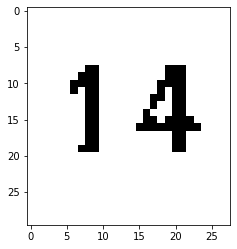

14



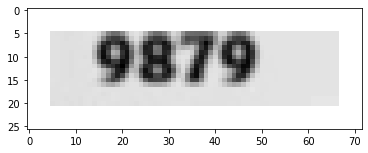

9879



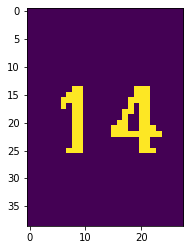

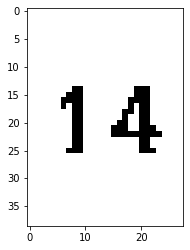

14



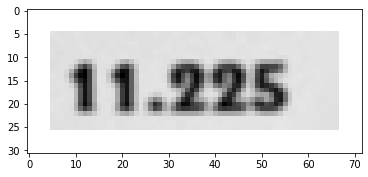

11225



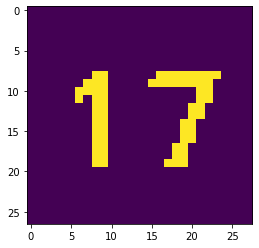

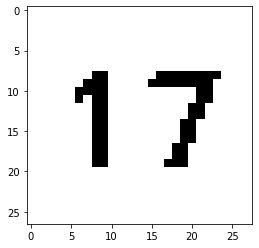

17



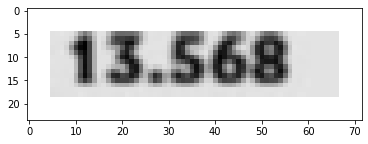

13568



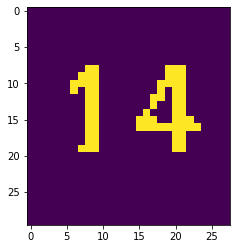

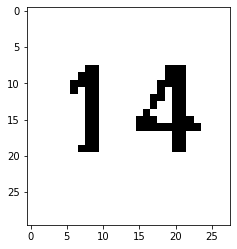

14



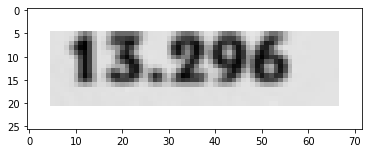

13296



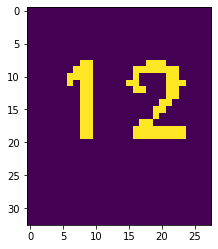

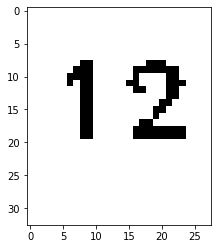

12



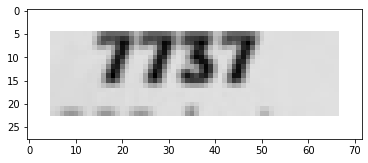

7737



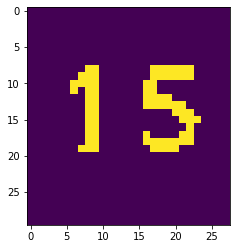

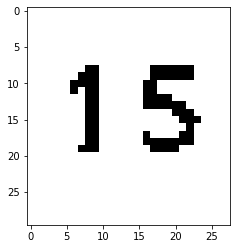

15



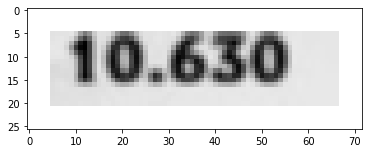

10630



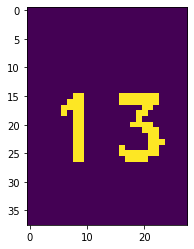

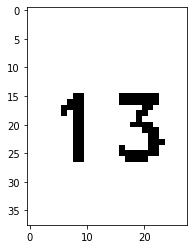

13



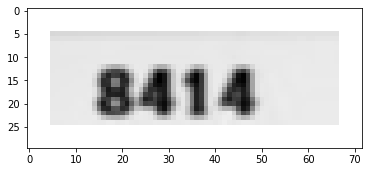

414



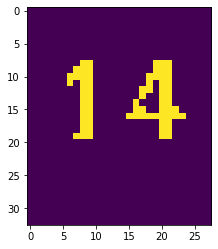

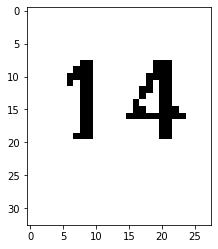

14



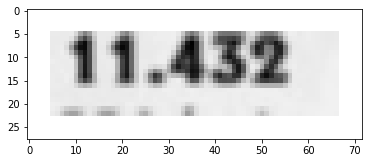

11432



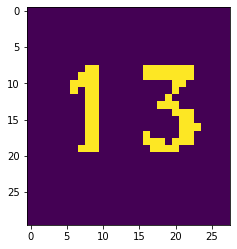

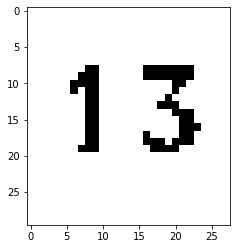

13



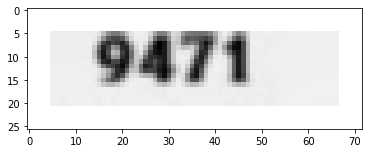

9471



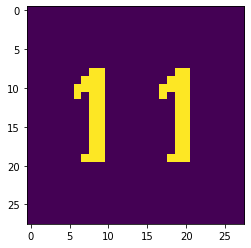

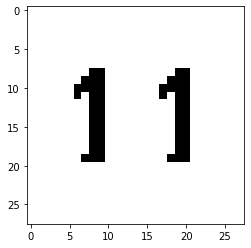

11



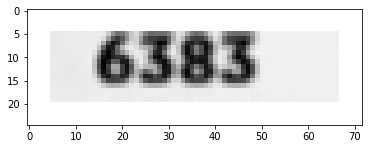

6383



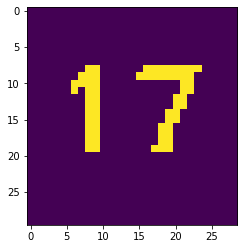

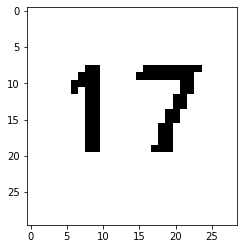

17



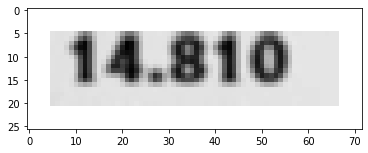

14810



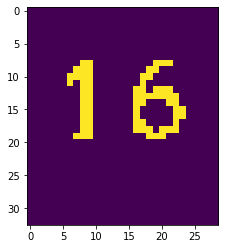

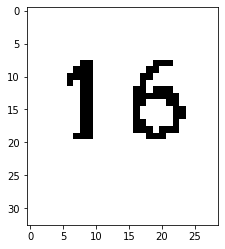

16



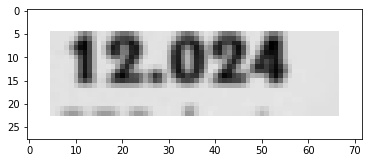

12024



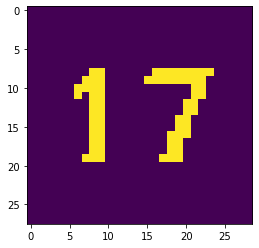

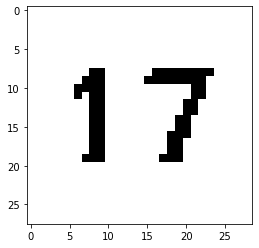

17



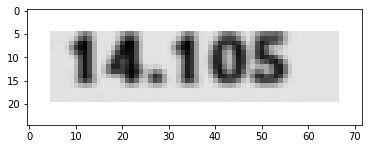

14105



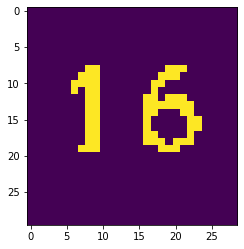

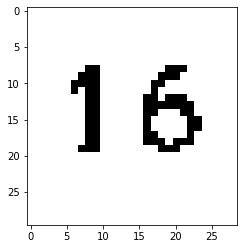

16



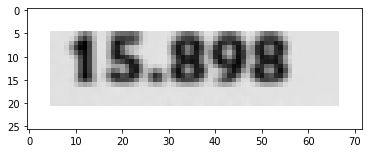

15898



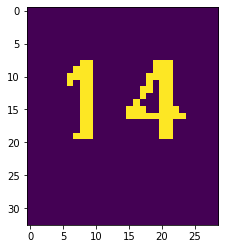

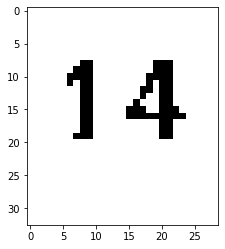

14



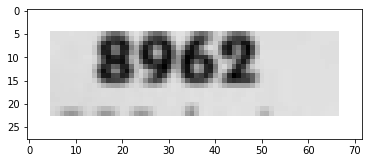

8962



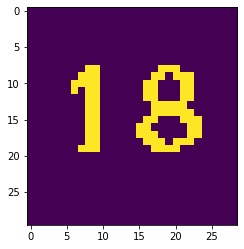

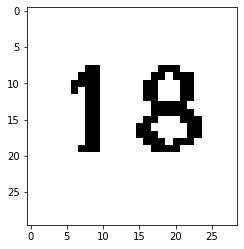

18



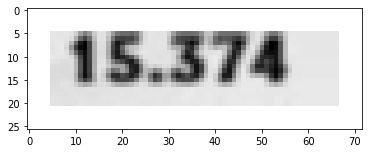

15374



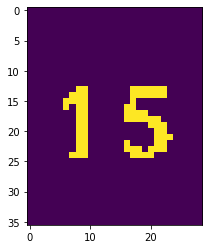

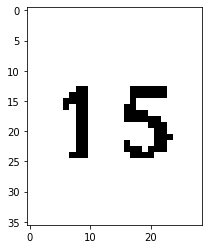

15



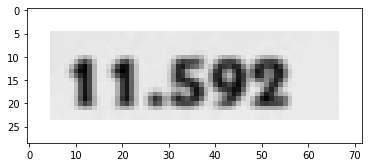

11592



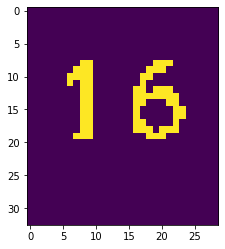

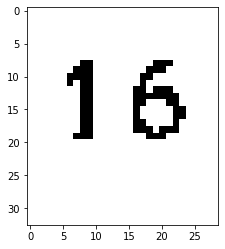

16



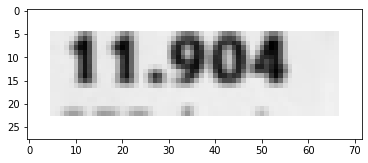

11904



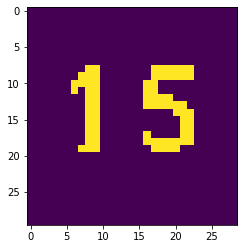

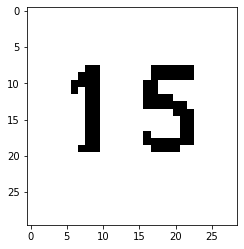

15



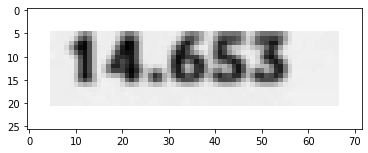

14653



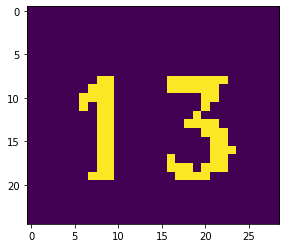

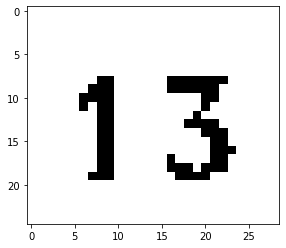

13



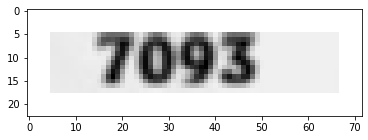

7093



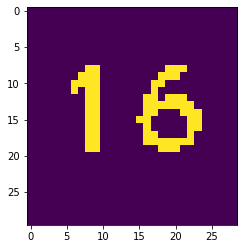

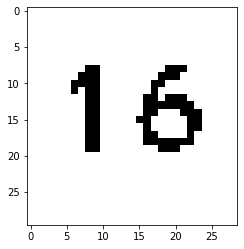

16



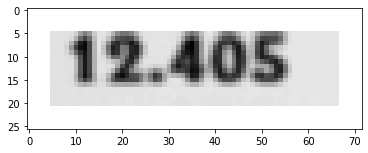

12405



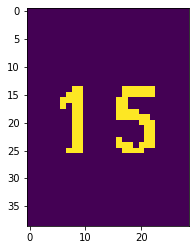

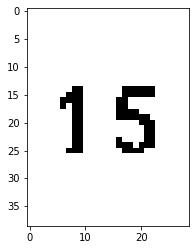

15



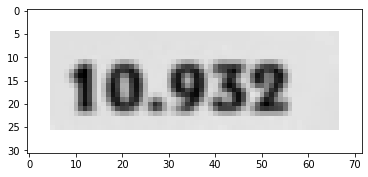

10932



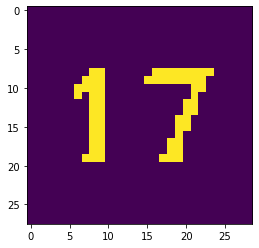

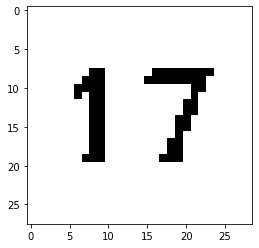

17



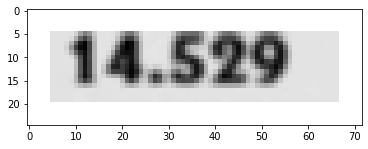

14529



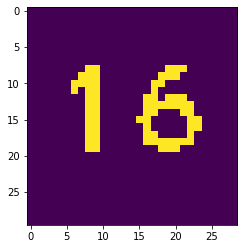

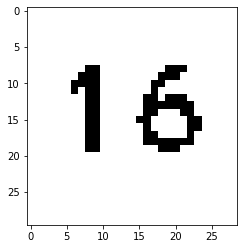

16



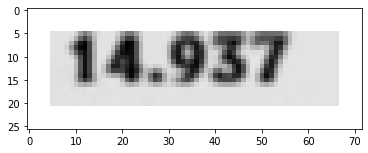

14937



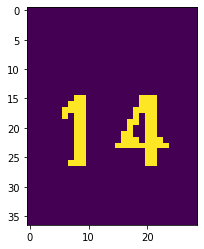

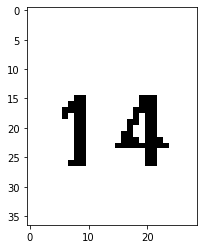

14



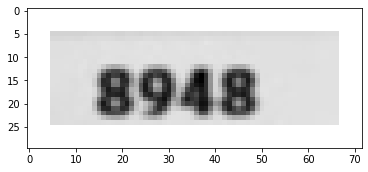

8948



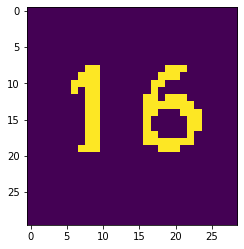

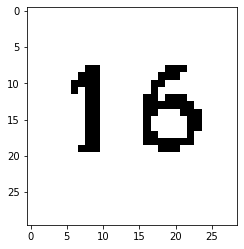

16



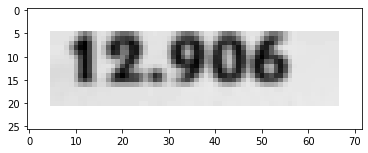

12906



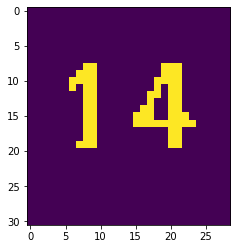

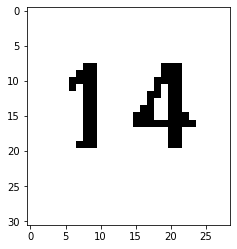

14



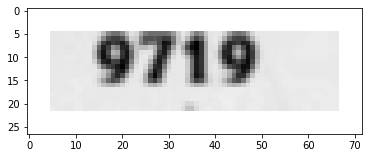

9719



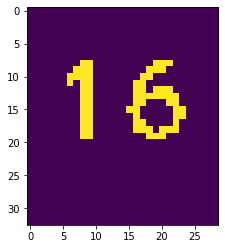

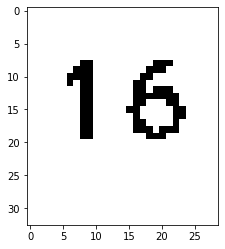

16



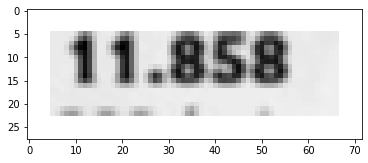

11858



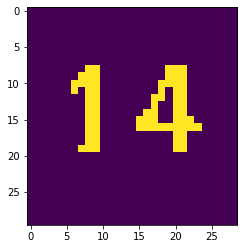

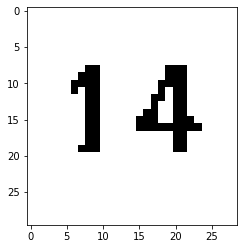

14



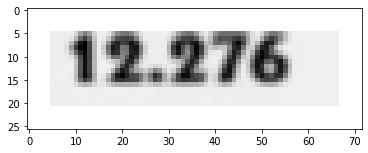

12276



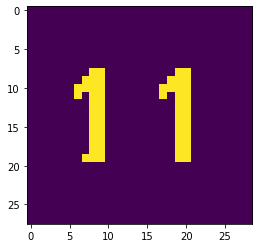

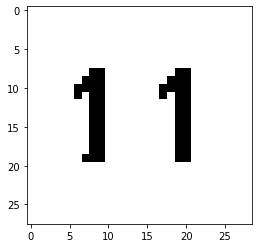

11



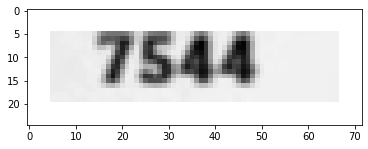

7544



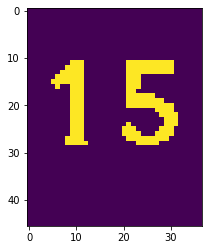

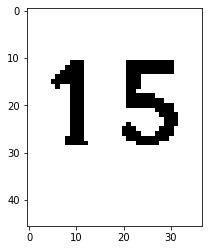

15



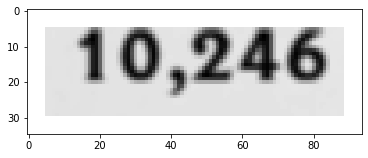

10246



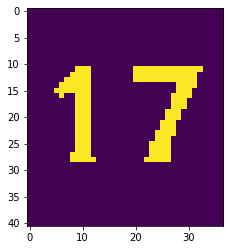

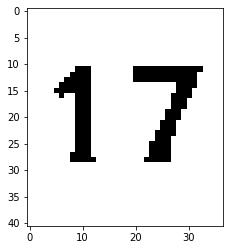

17



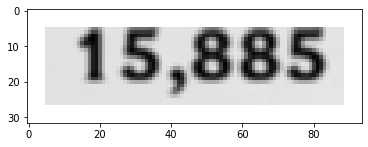

15885



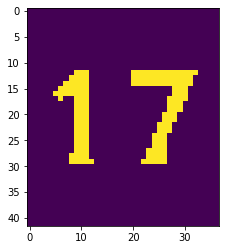

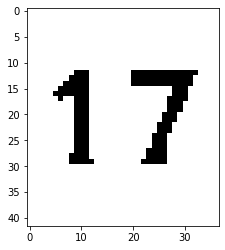

17



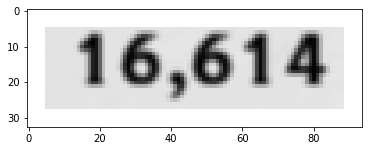

16614



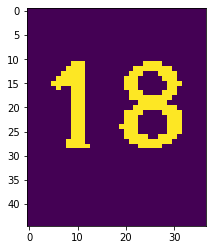

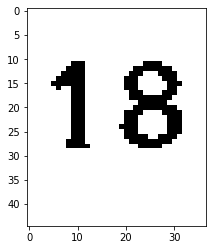

18



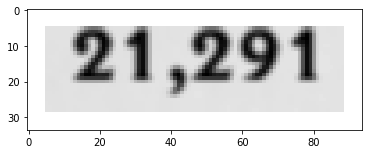

21291



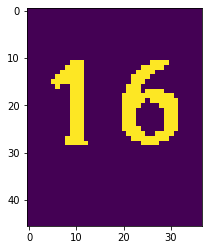

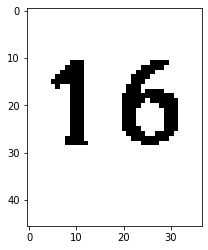

16



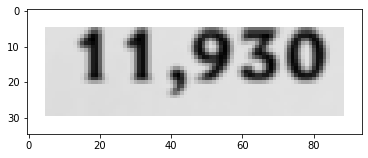

11930



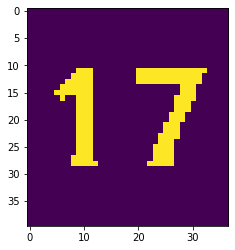

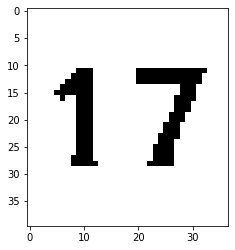

17



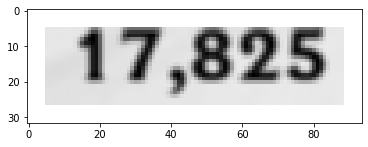

17825



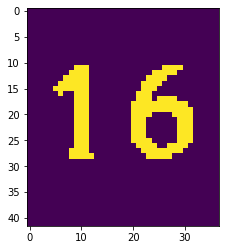

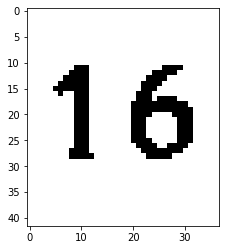

16



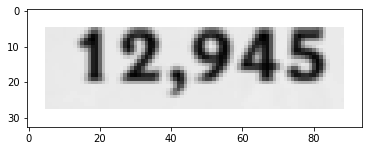

12945



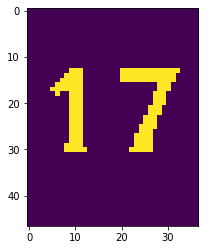

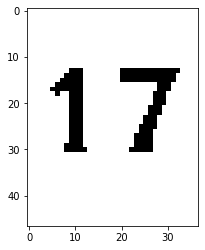

17



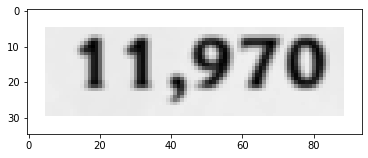

11970



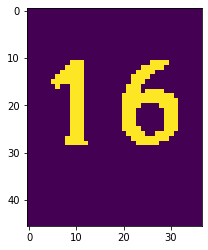

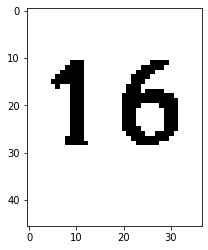

16



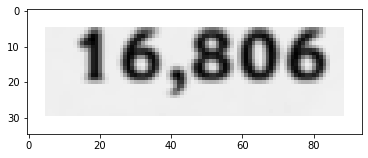

16806



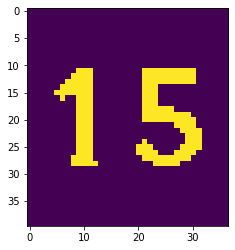

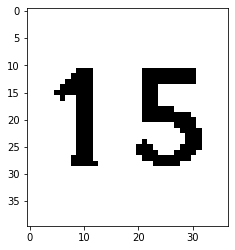

15



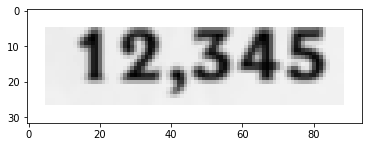

12345



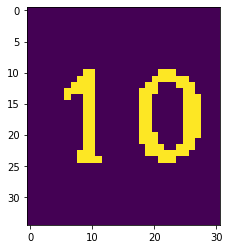

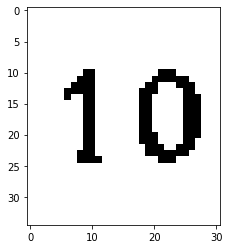

10



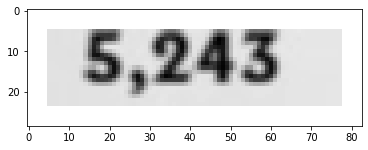

5243



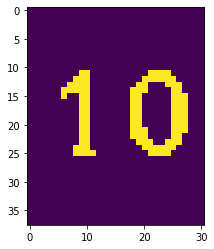

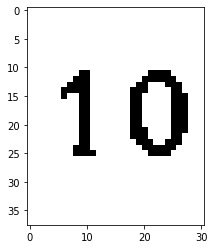

10



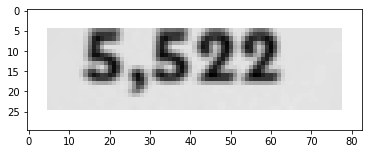

5522



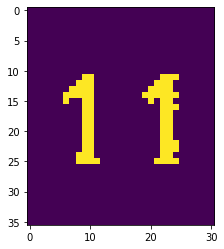

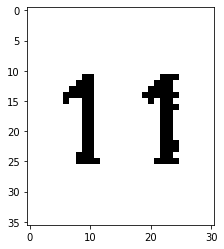

11



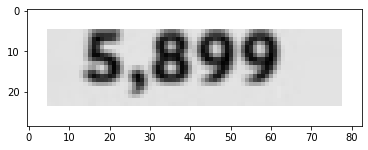

5899



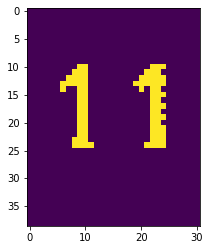

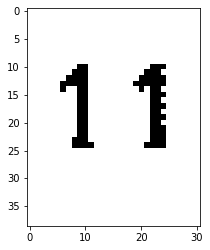

11



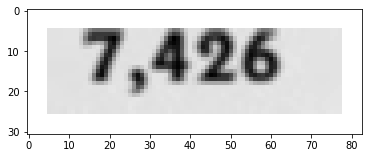

7426



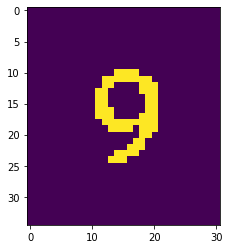

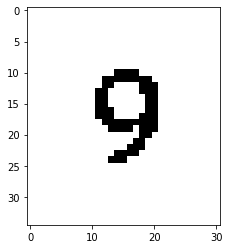

9



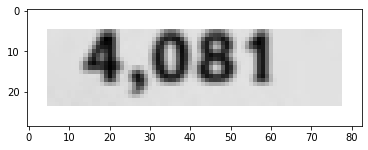

4081



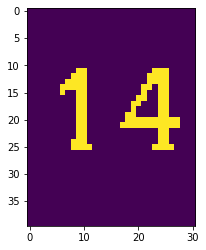

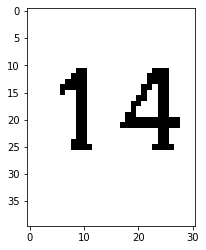

14



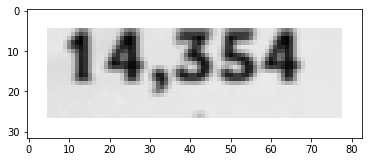

14354



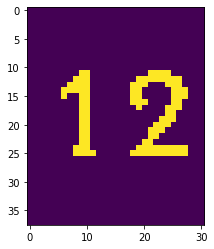

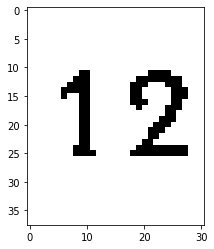

12



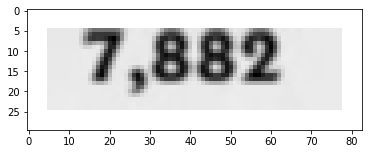

7882



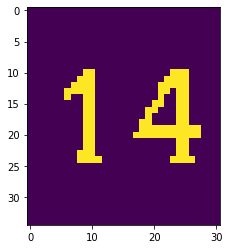

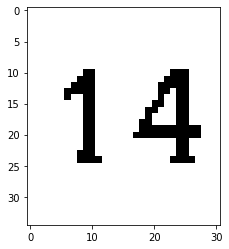

14



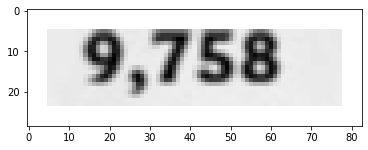

9758



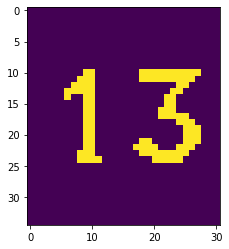

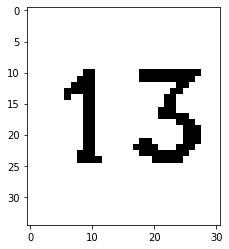

13



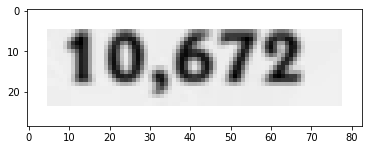

10672



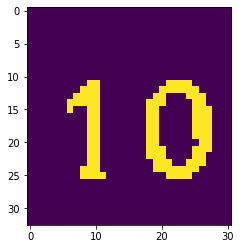

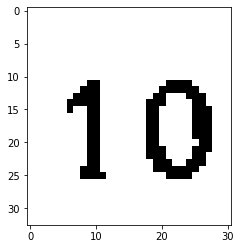

10



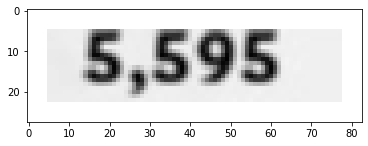

5595



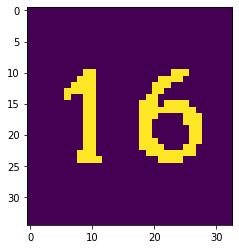

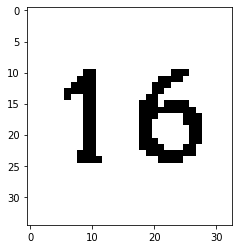

16



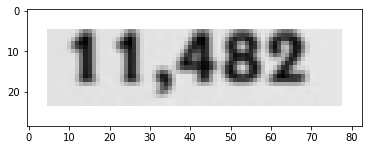

11482



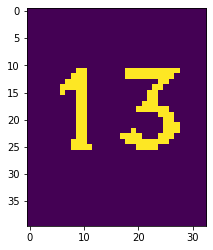

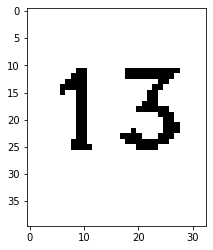

13



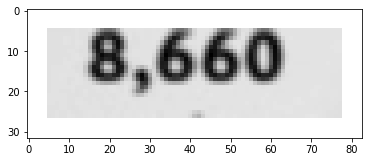

8660



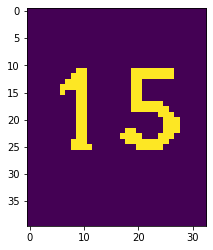

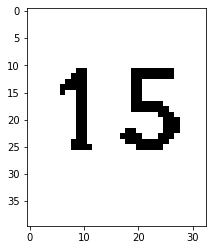

15



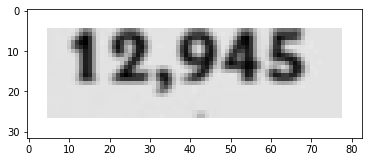

12945



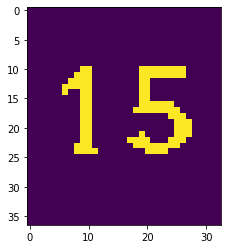

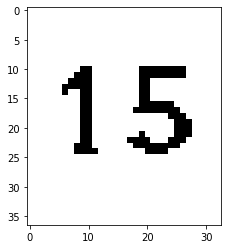

15



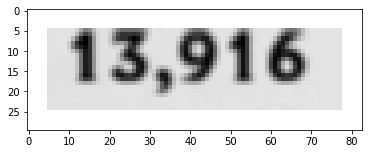

13916



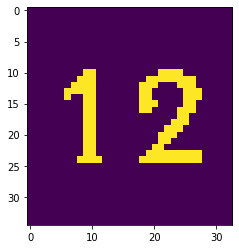

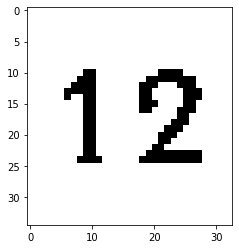

12



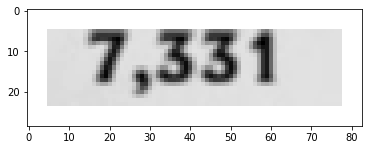

7331



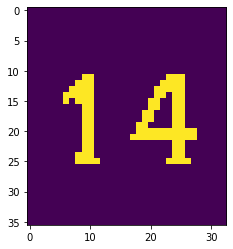

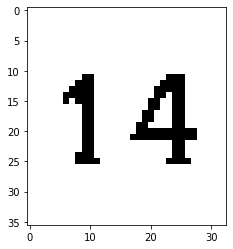

14



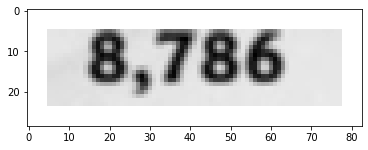

8786



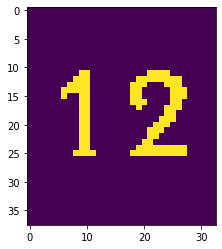

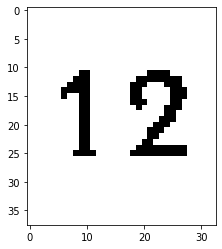

12



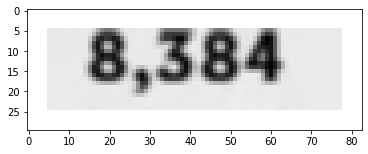

8384



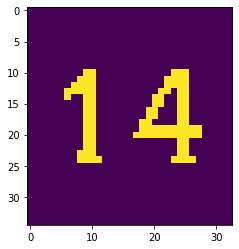

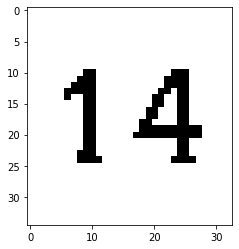

14



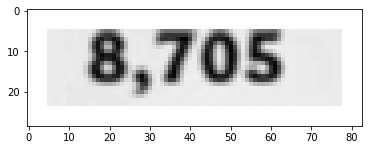

8705



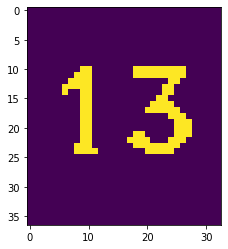

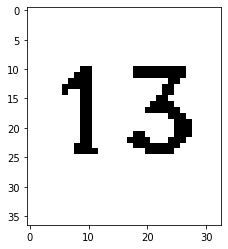

13



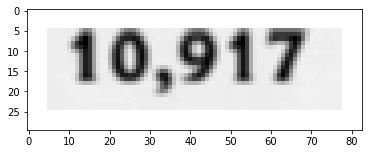

10917



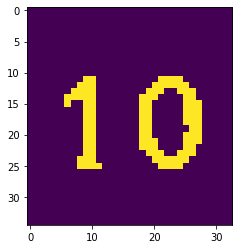

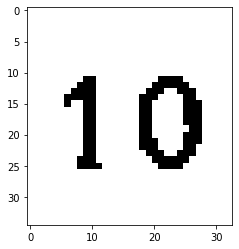

10



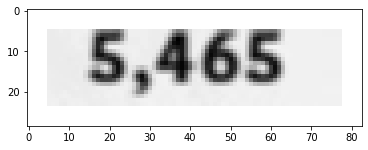

5465



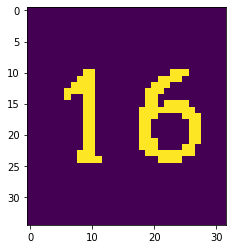

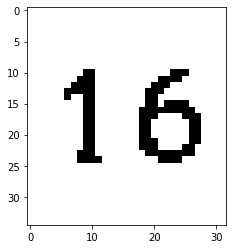

16



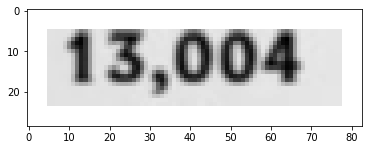

13004



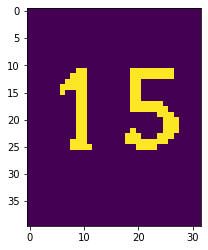

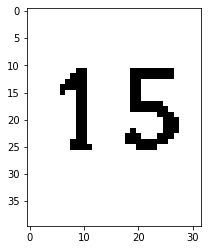

15



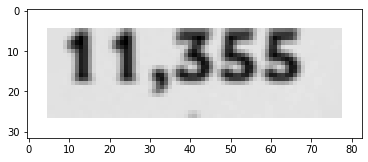

11355



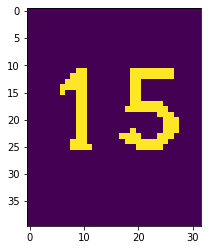

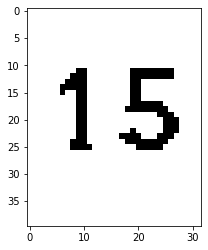

15



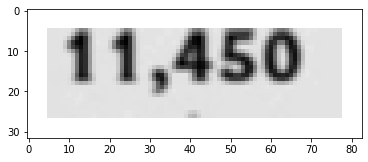

11450



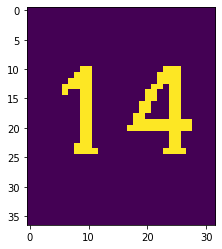

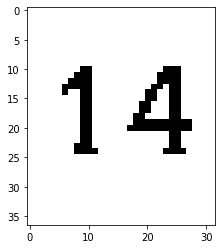

14



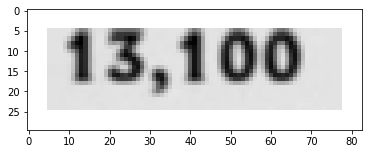

13100



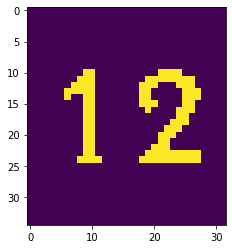

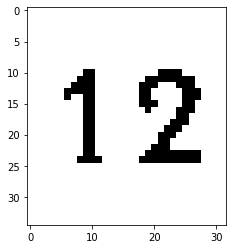

12



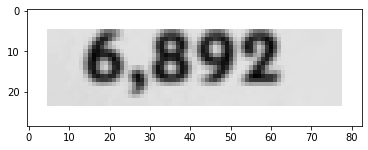

6892



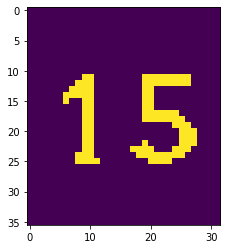

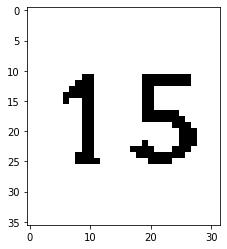

15



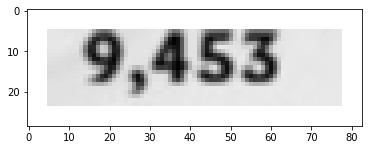

9453



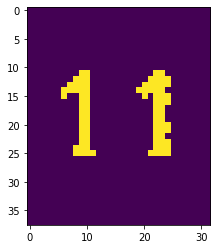

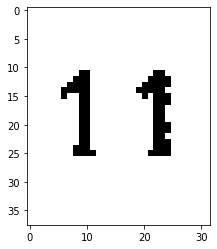

11



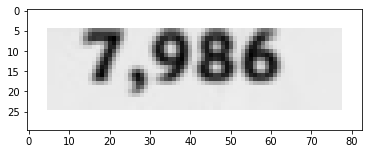

7986



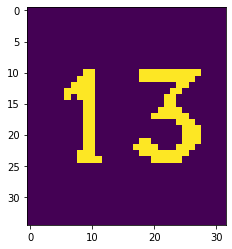

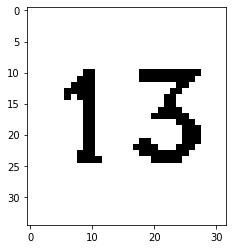

13



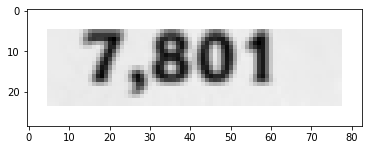

7801



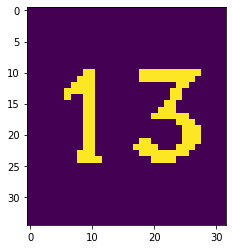

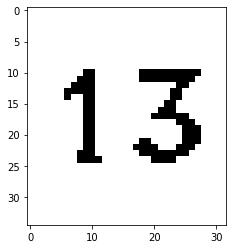

13



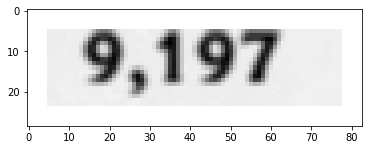

9197



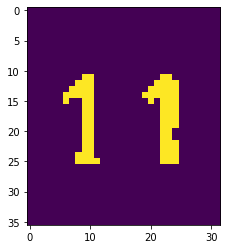

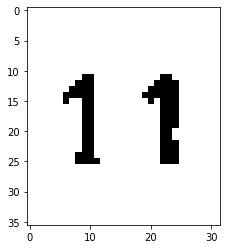

11



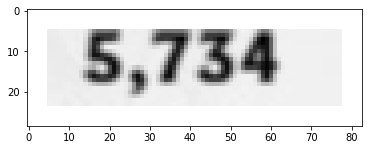

5734



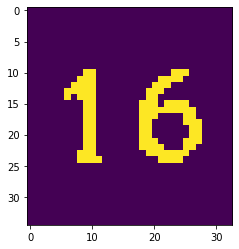

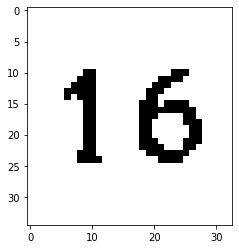

16



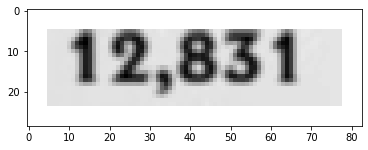

12831



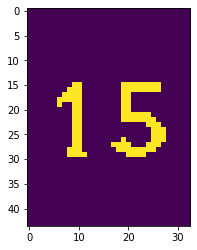

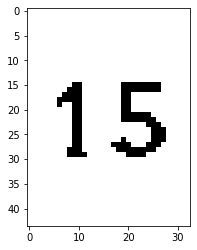

15



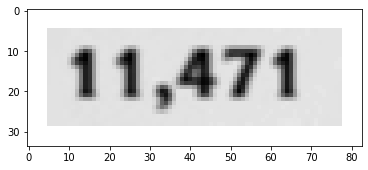

11471



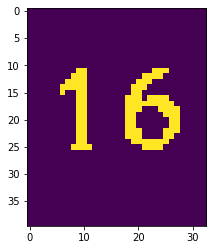

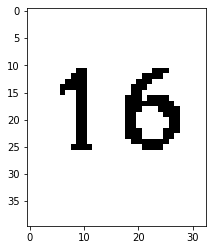

16



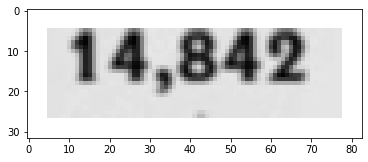

14842



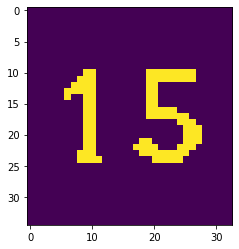

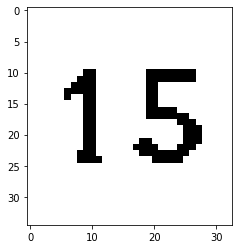

15



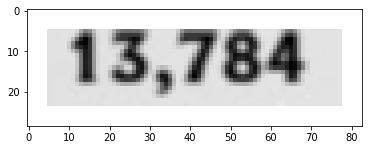

13784



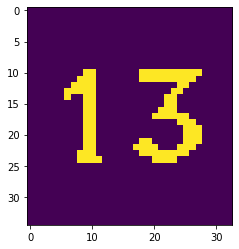

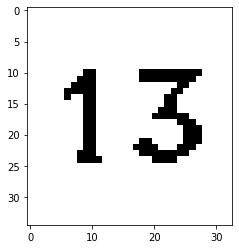

13



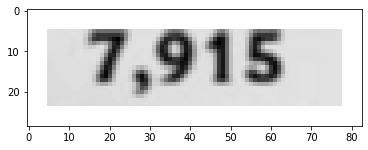

7915



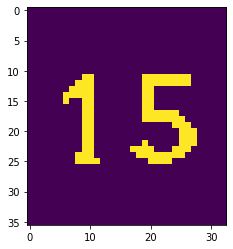

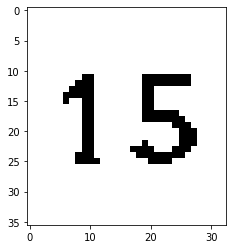

15



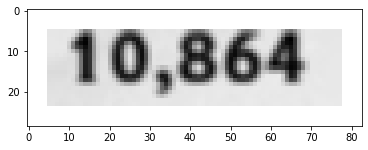

10864



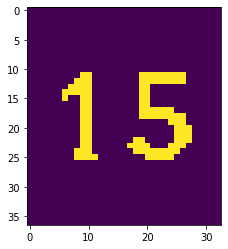

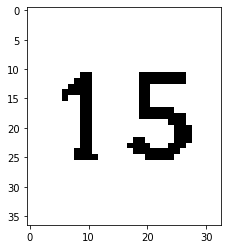

15



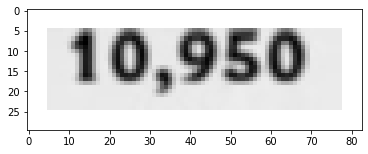

10950



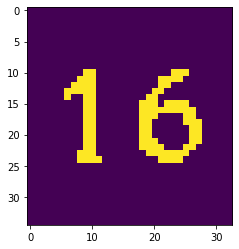

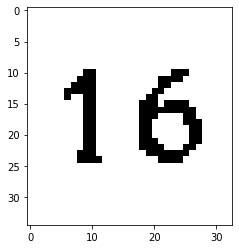

16



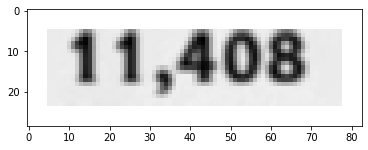

11408



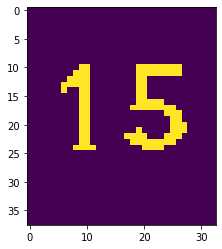

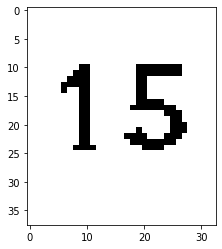

15



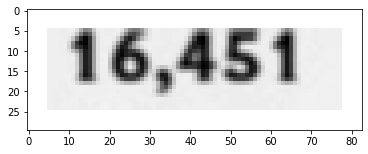

16451



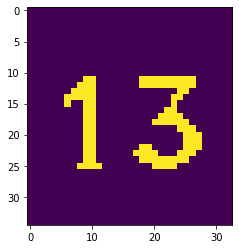

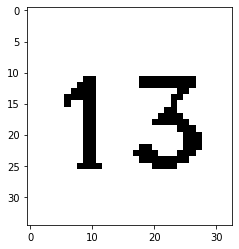

13



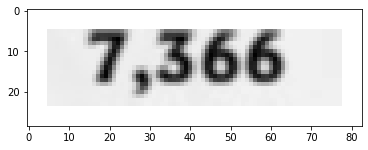

7366



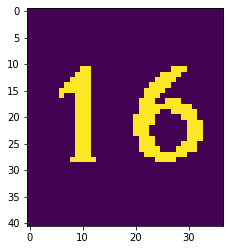

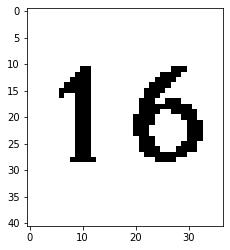

16



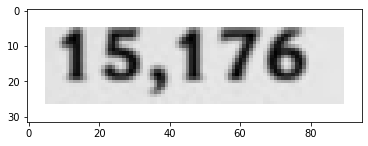

15176



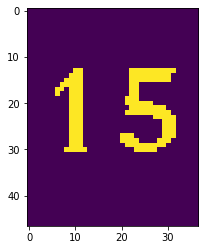

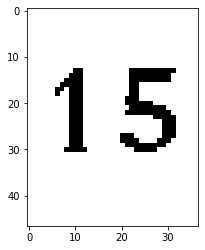

15



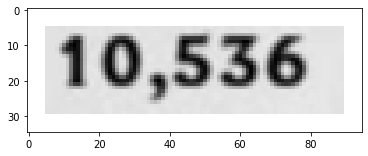

10536



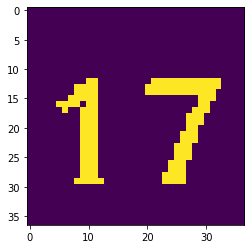

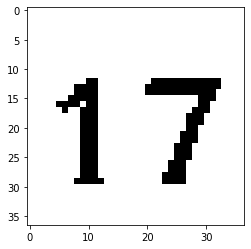

17



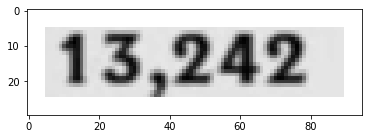

13242



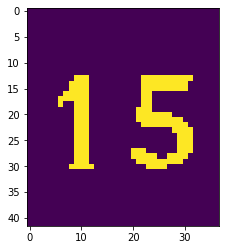

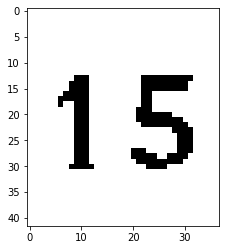

15



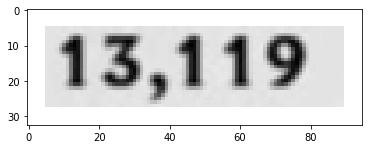

13119



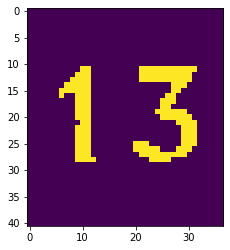

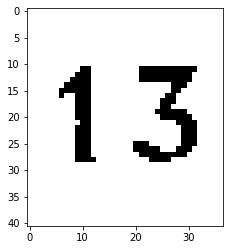

13



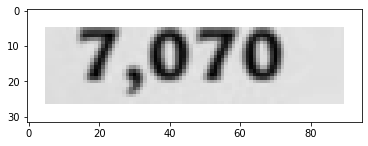

7070



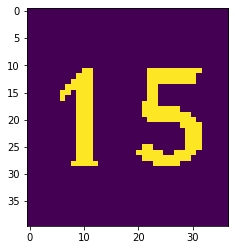

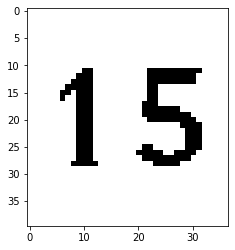

15



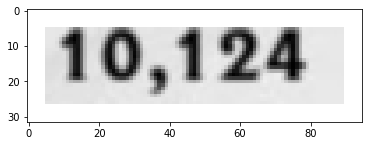

10124



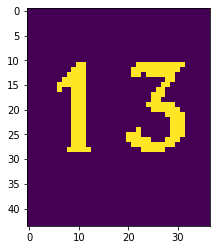

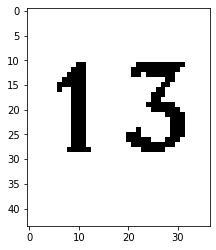

13



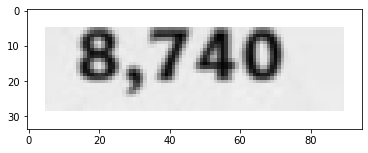

8740



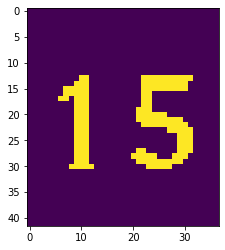

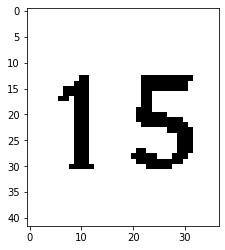

15



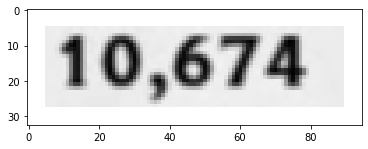

10674



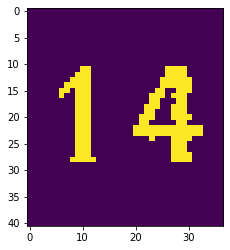

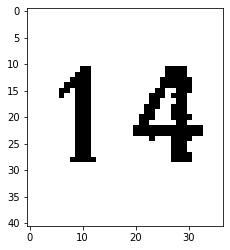

14



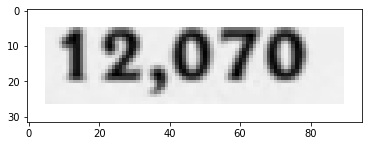

12070



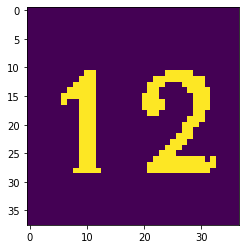

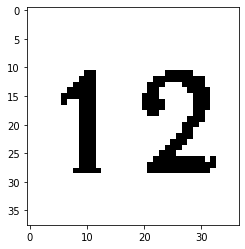

12



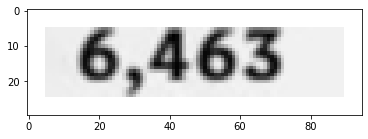

6463



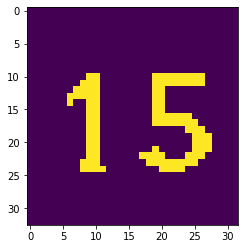

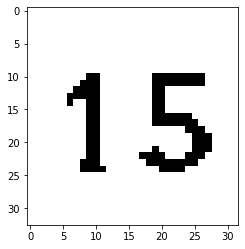

15



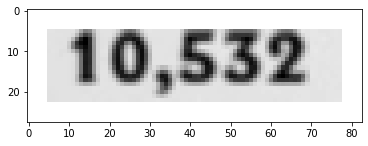

10532



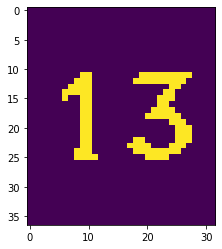

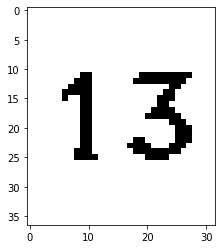

13



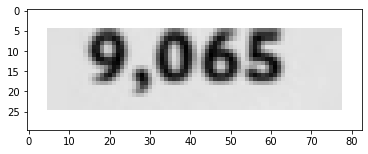

9065



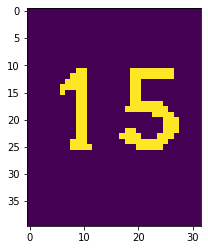

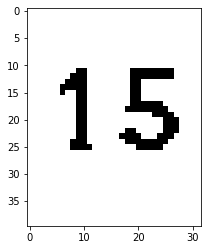

15



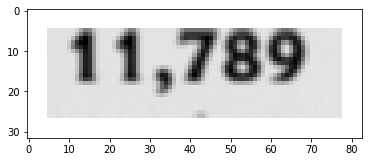

11789



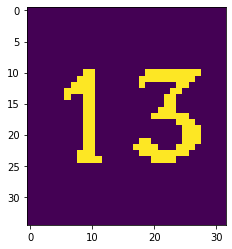

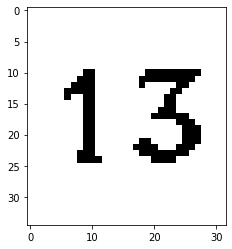

13



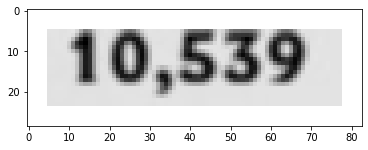

10539



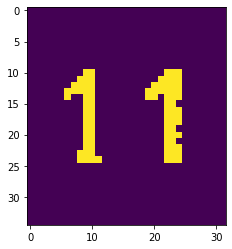

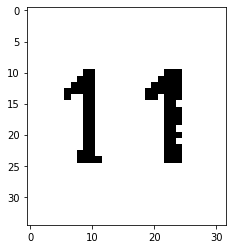

11



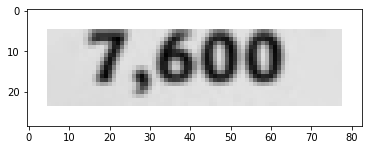

7600



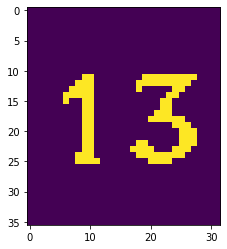

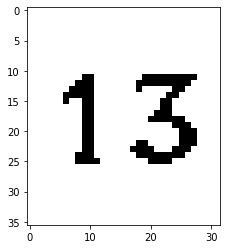

13



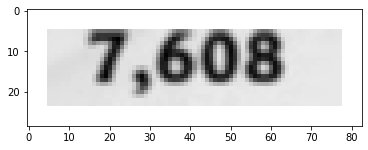

7608



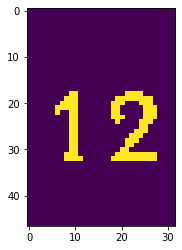

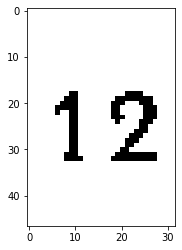

12



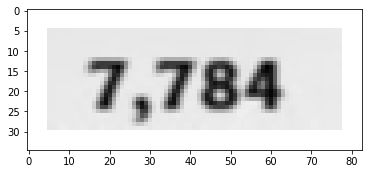

7784



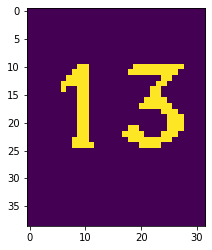

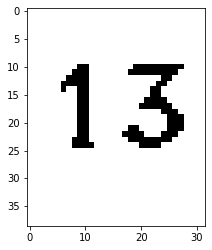

13



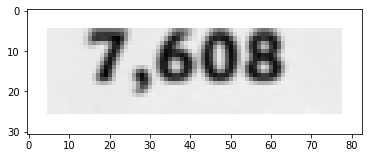

7608



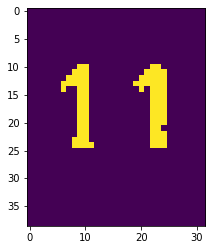

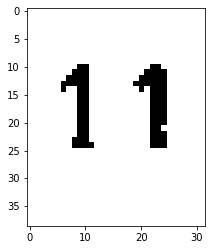

11



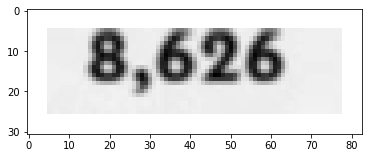

8626



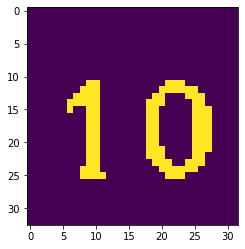

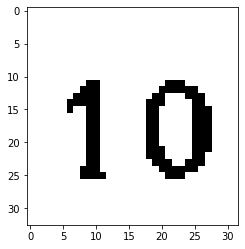

10



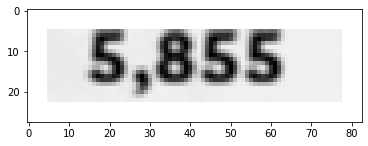

5855



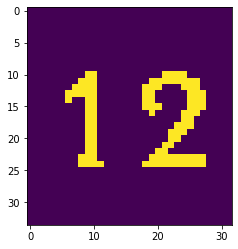

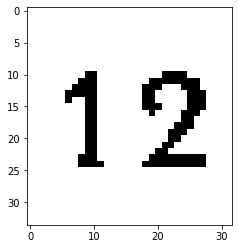

12



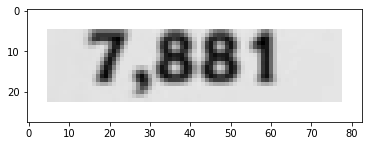

7881



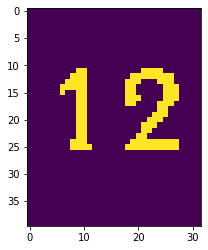

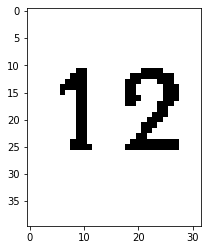

12



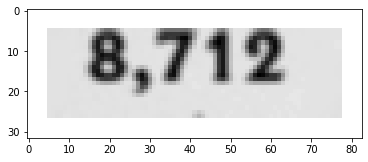

8712



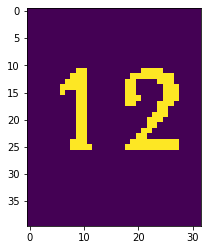

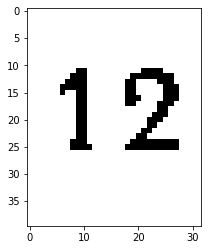

12



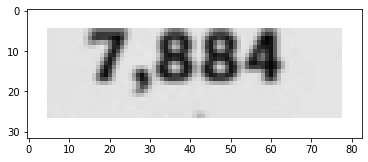

7884



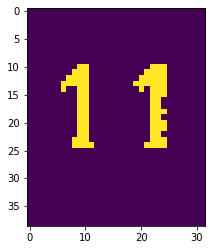

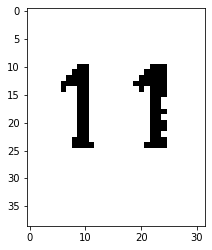

11



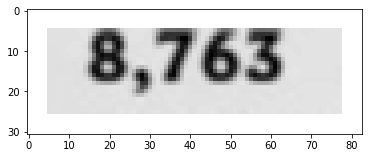

8763



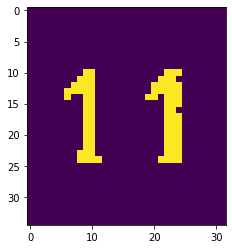

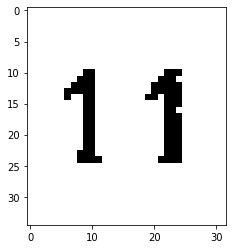

11



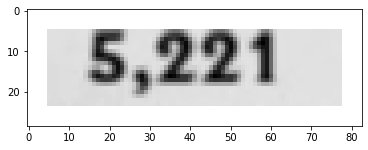

5221



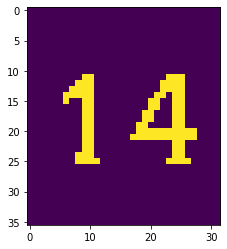

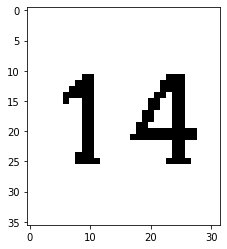

14



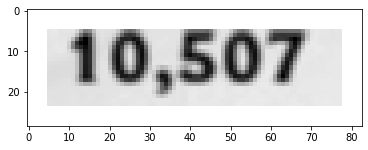

10507



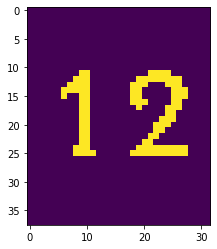

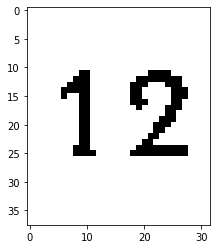

12



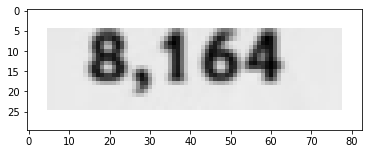

8164



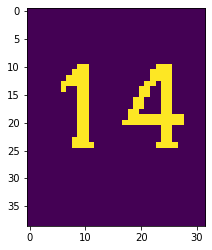

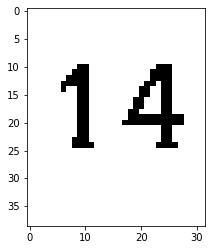

14



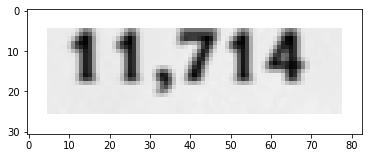

11714



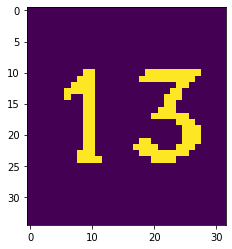

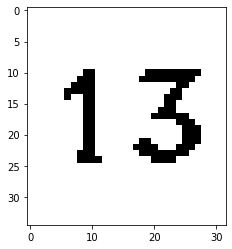

13



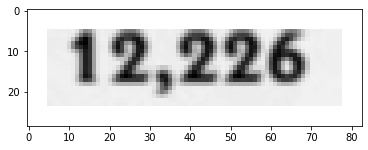

12226



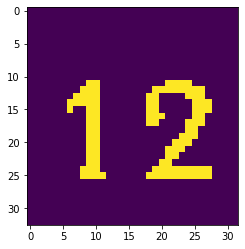

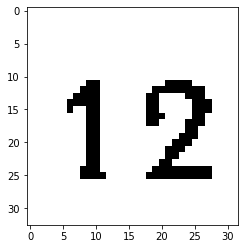

12



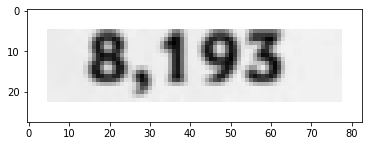

8193



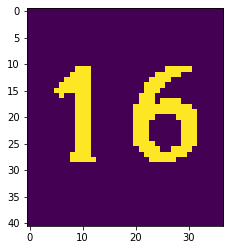

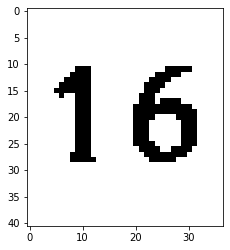

16



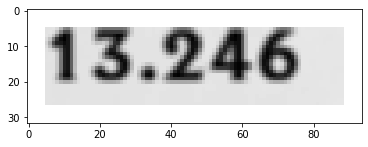

13246



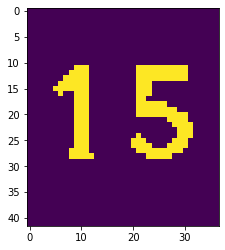

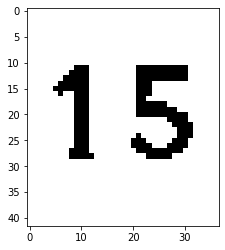

15



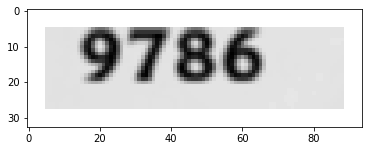

9786



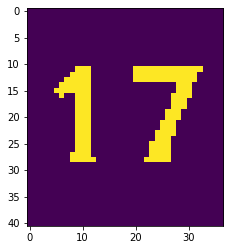

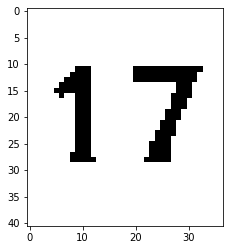

17



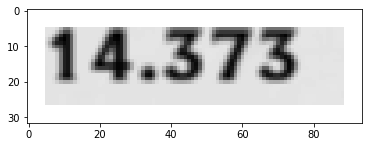

14373



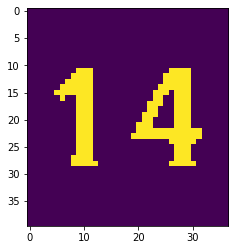

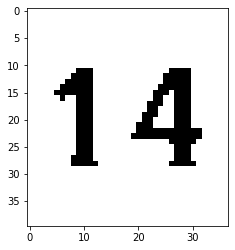

14



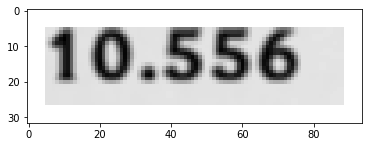

10556



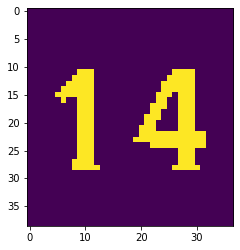

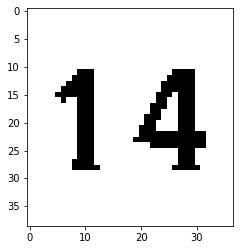

14



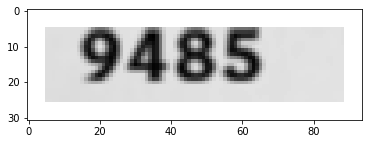

9485



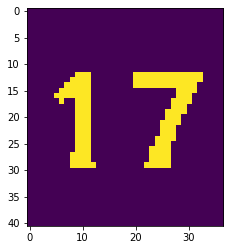

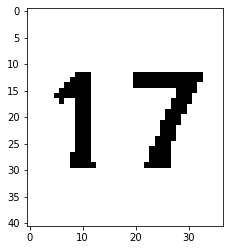

17



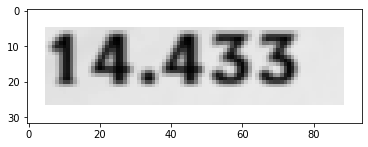

14433



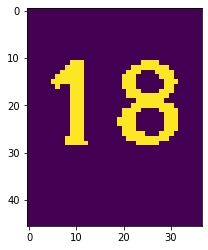

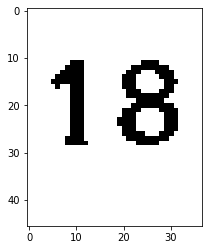

18



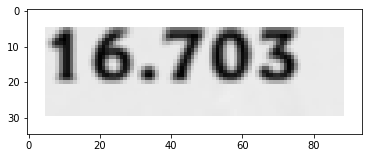

16703



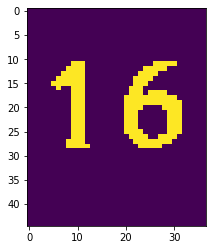

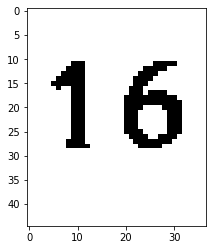

16



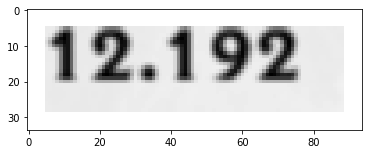

12192



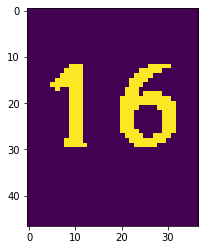

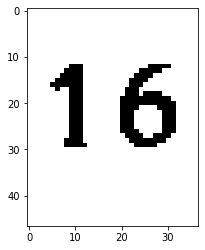

16



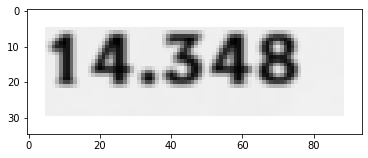

14348



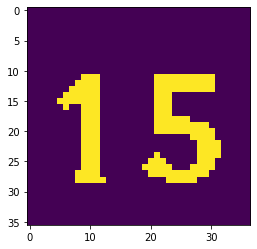

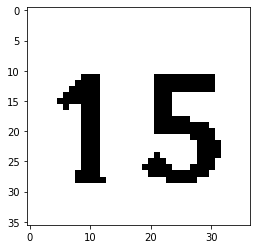

15



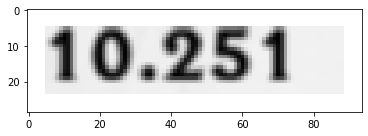

10251



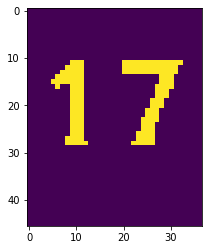

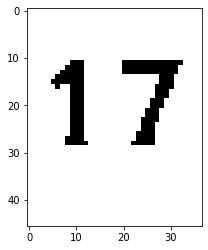

17



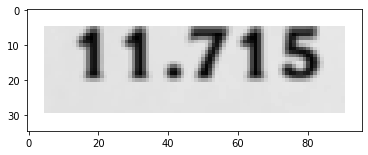

11715



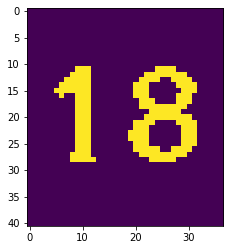

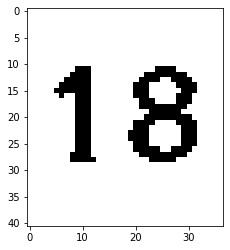

18



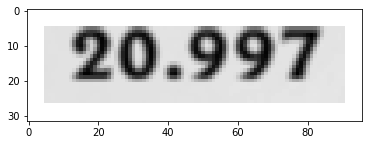

20997



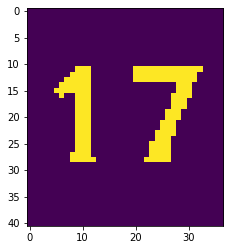

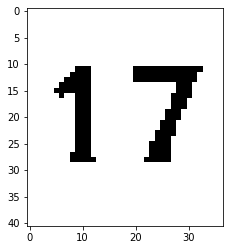

17



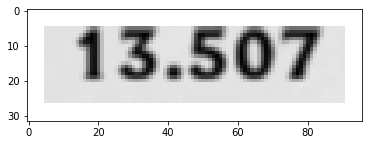

13507



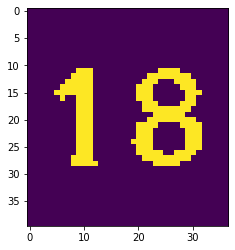

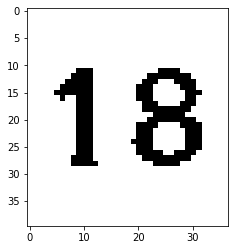

18



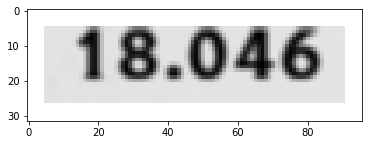

18046



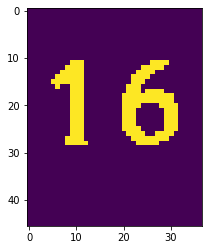

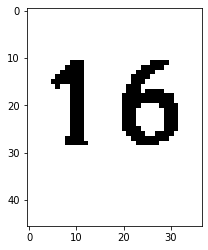

16



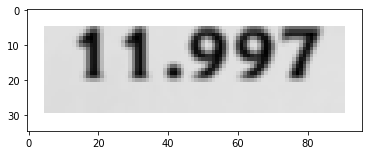

11997



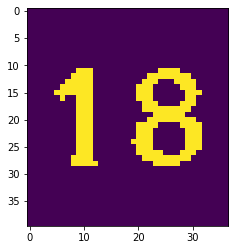

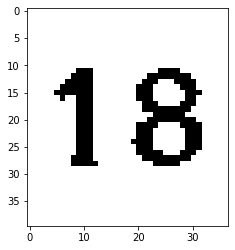

18



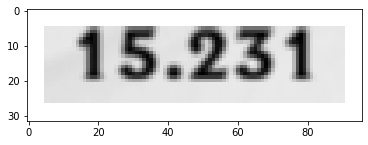

15231



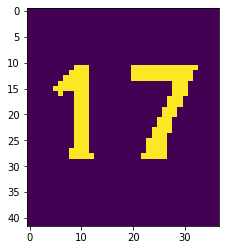

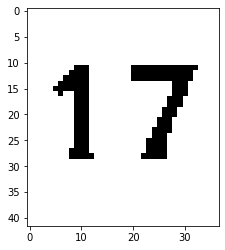

17



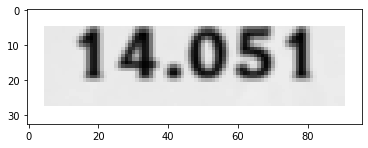

14051



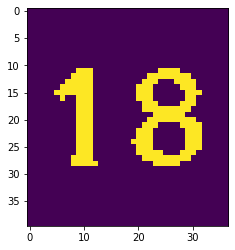

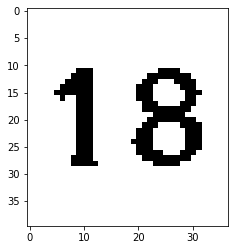

18



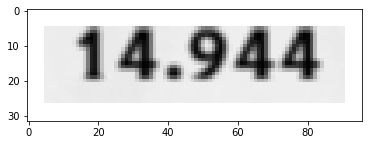

14944



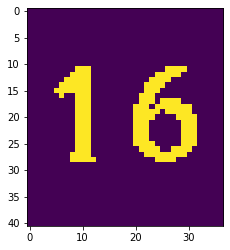

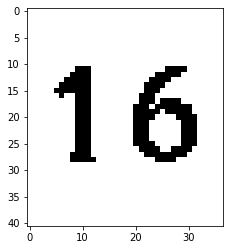

16



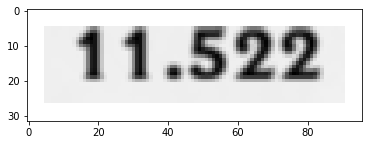

11522



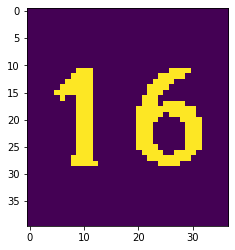

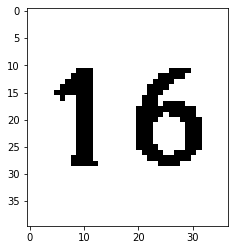

16



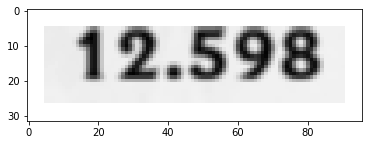

12598



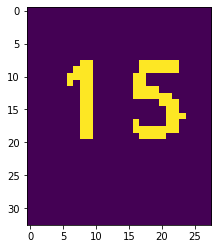

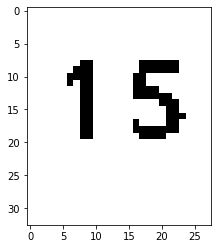

15



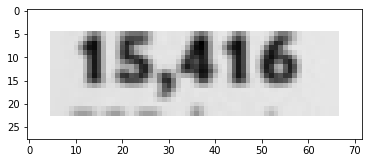

15416



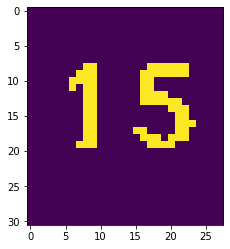

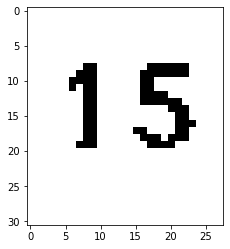

15



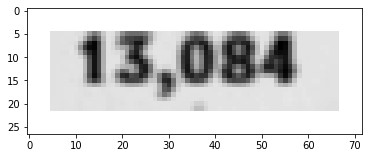

13084



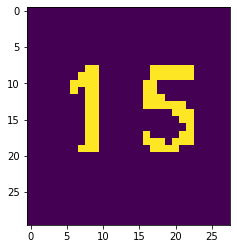

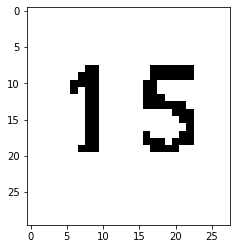

15



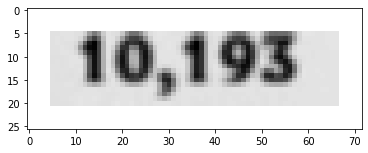

10193



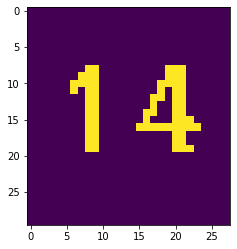

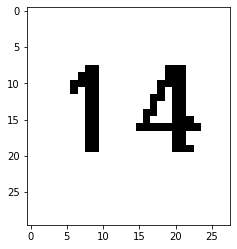

14



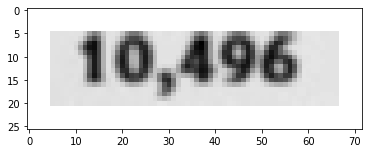

10496



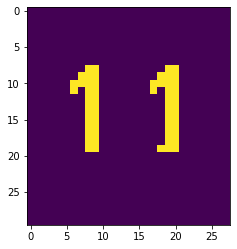

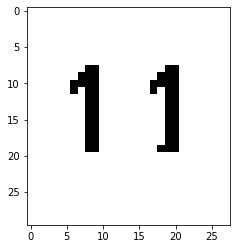

11



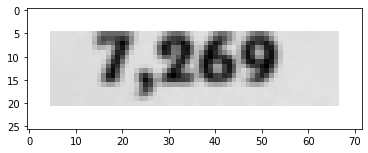

7269



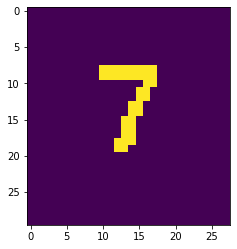

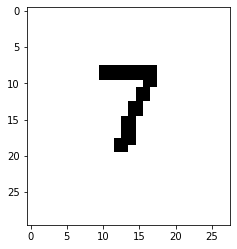

7



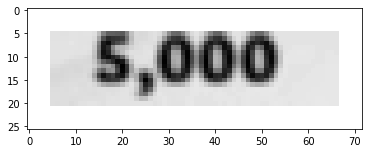

5000



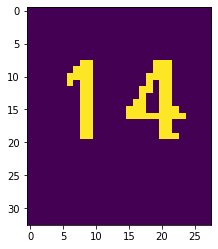

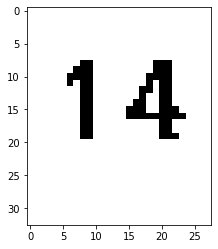

14



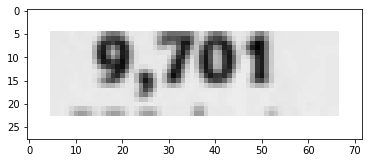

9701



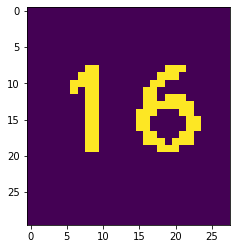

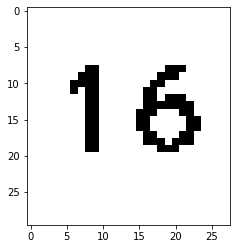

16



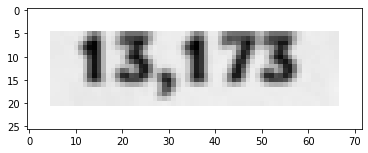

13173



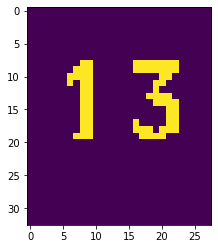

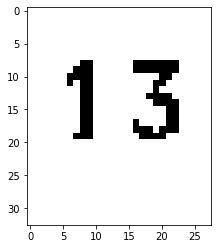

13



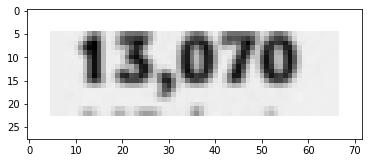

13070



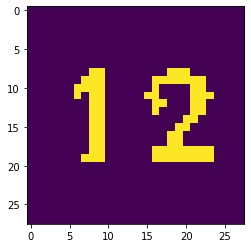

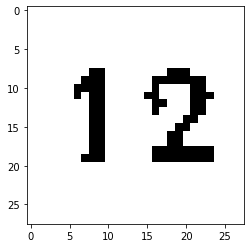

12



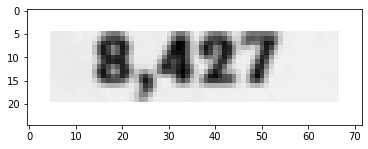

8427



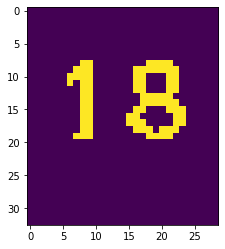

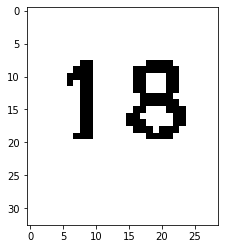

18



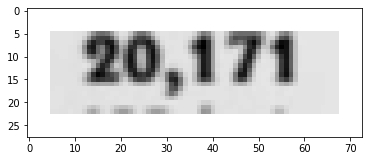

20171



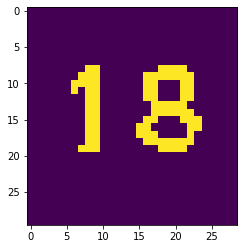

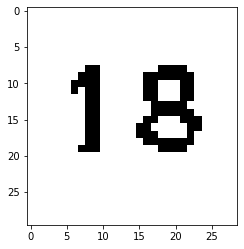

18



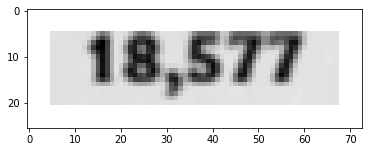

18577



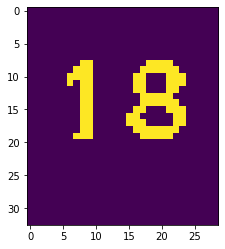

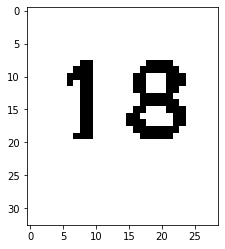

18



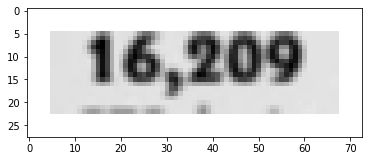

16209



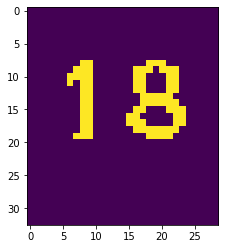

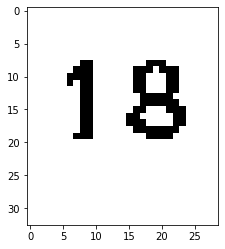

18



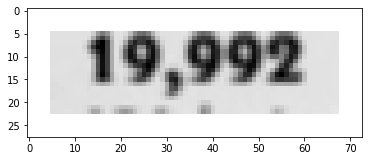

19992



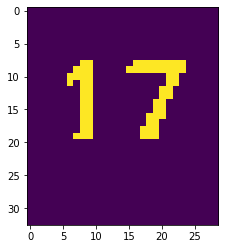

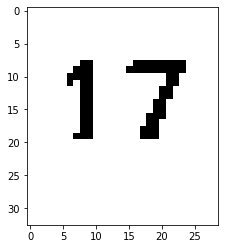

17



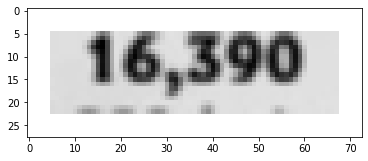

16390



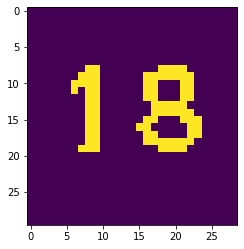

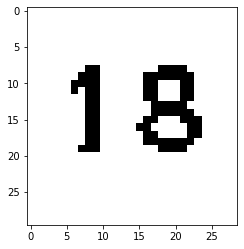

18



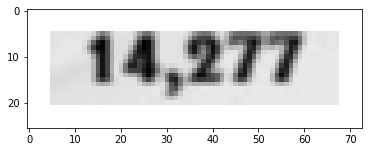

14277



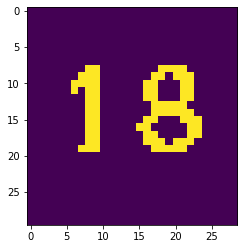

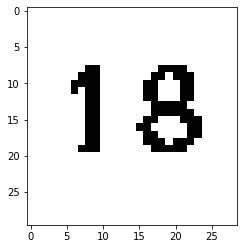

18



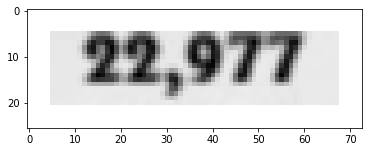

22977



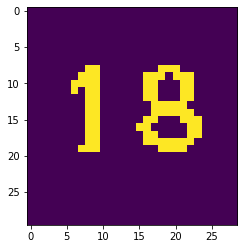

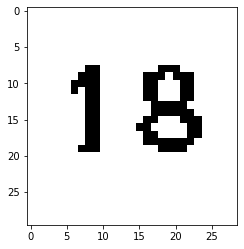

18



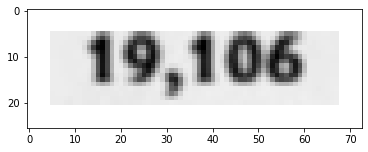

19106



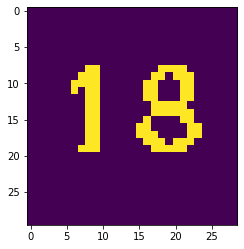

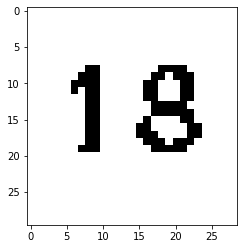

18



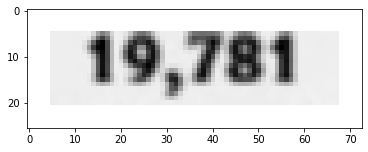

19781



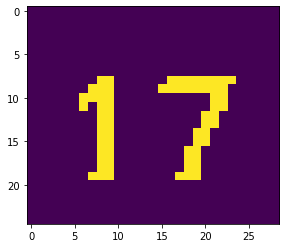

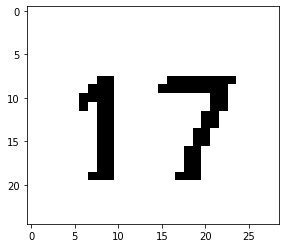

17



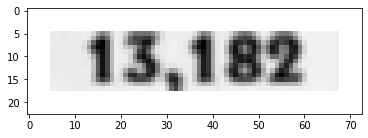

13182



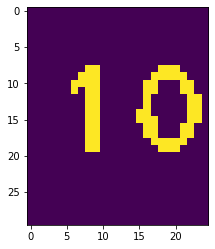

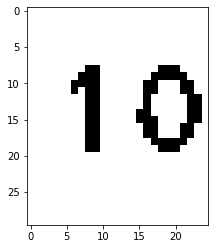

10



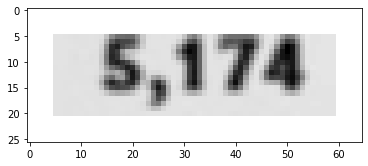

5174



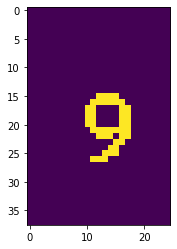

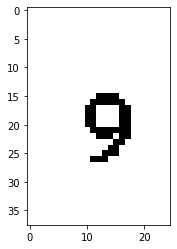

9



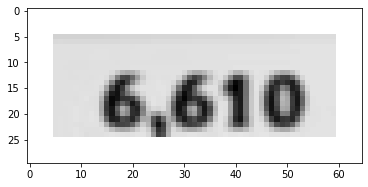

6610



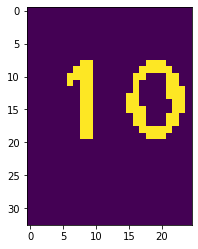

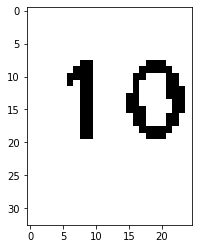

10



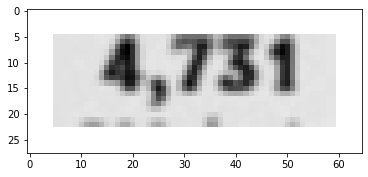

4731



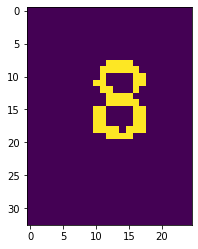

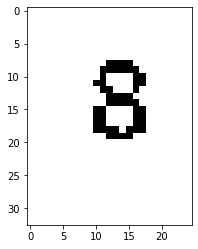

8



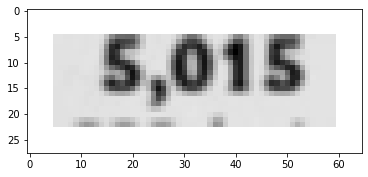

5015



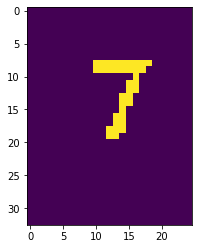

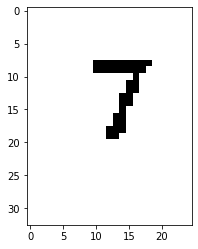

7



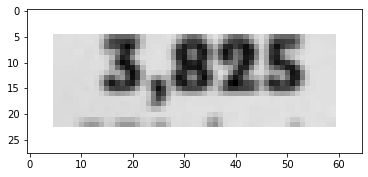

3825



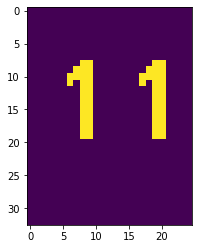

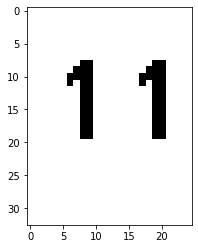

11



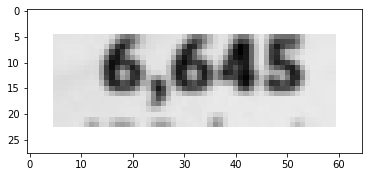

6645



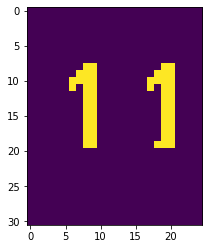

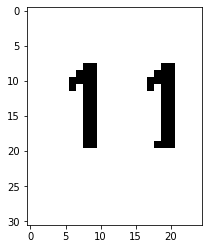

11



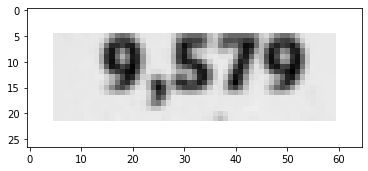

9579



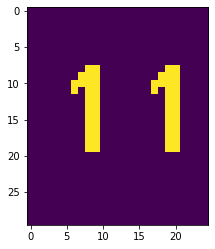

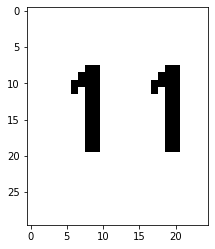

11



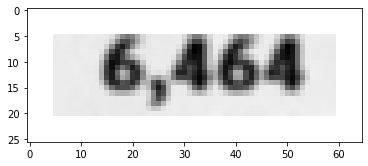

6464



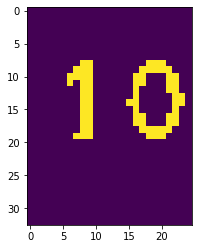

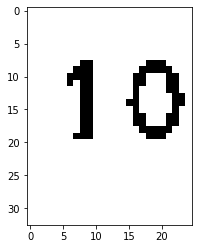

10



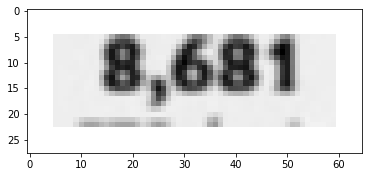

8681



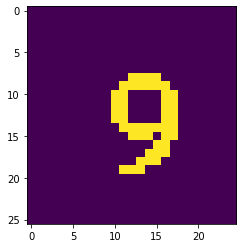

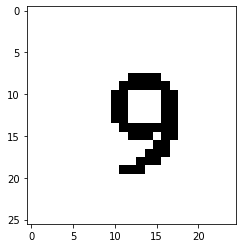

9



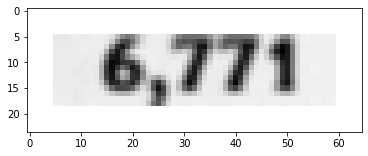

6771



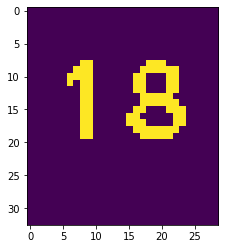

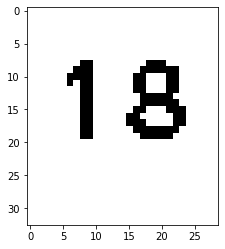

18



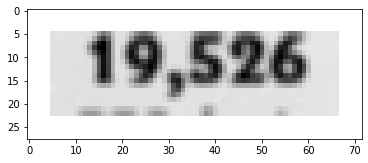

19526



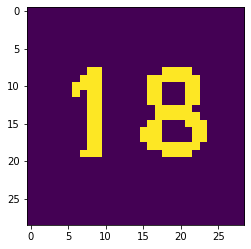

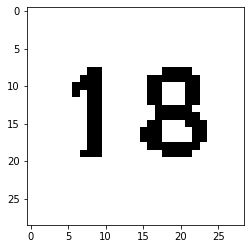

18



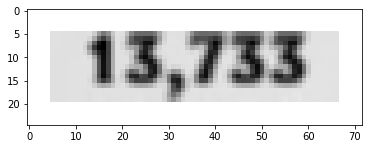

13733



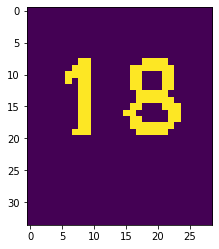

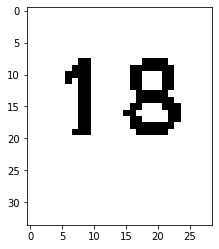

18



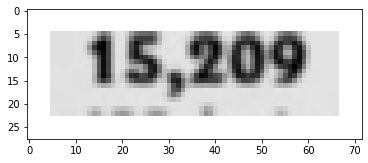

15209



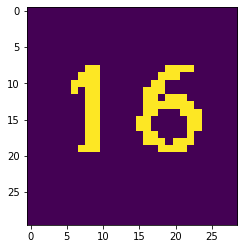

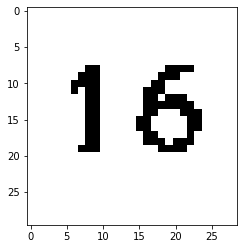

16



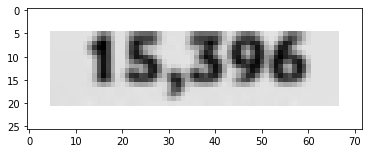

15396



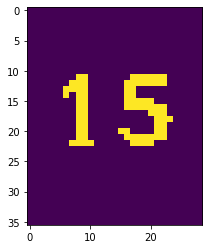

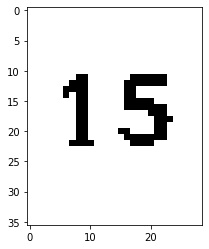

15



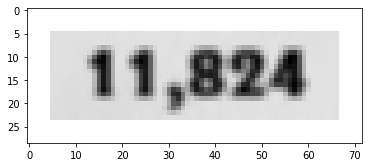

11824



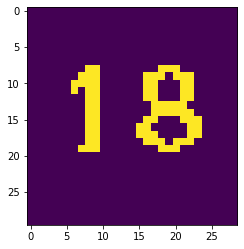

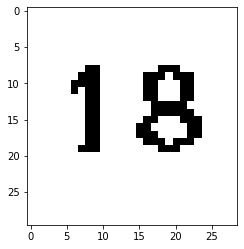

18



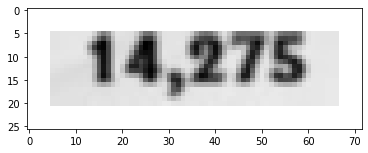

14275



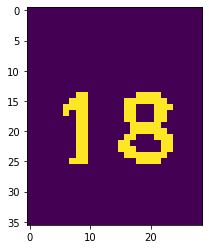

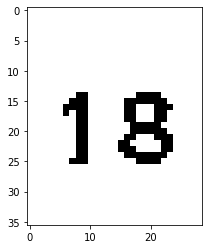

18



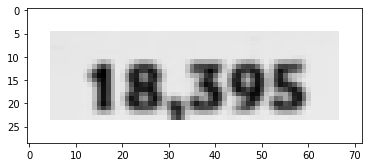

18395



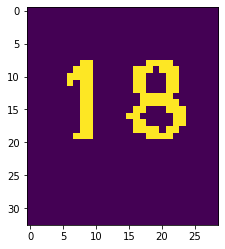

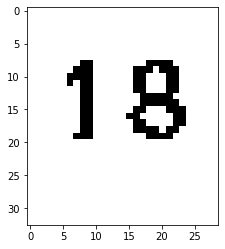

18



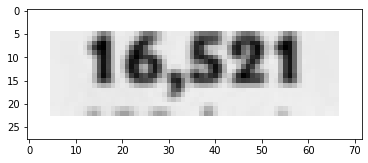

16521



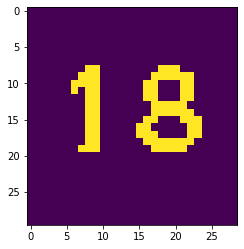

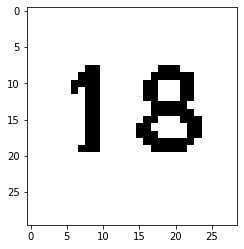

18



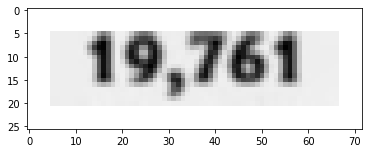

19761



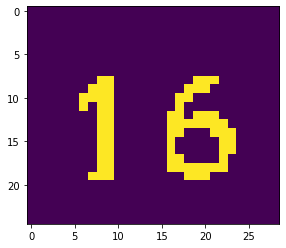

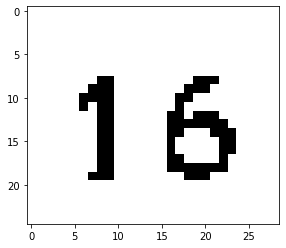

16



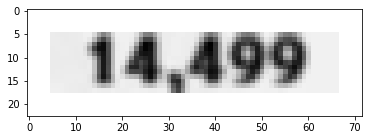

14499



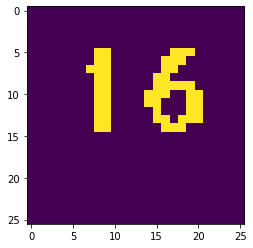

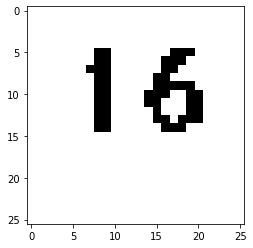

16



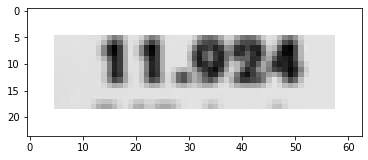

11004



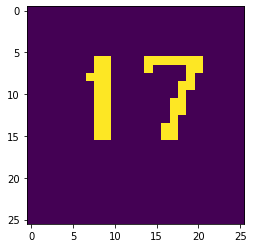

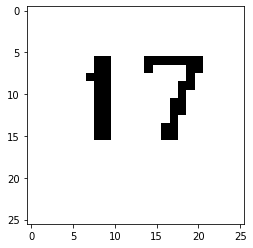

17



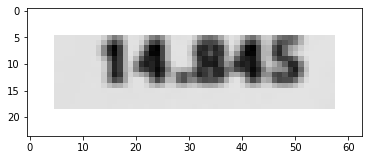

14645



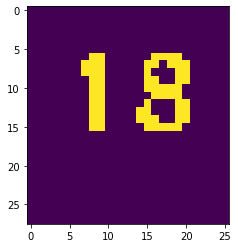

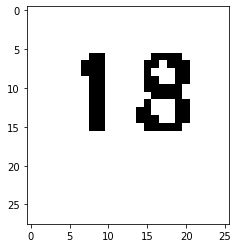

18



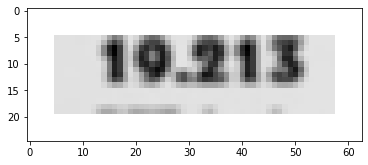

19213



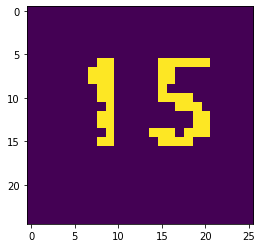

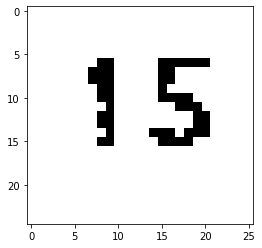

15



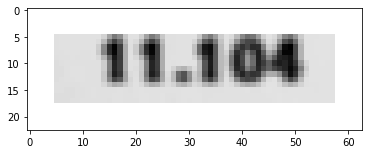

11106



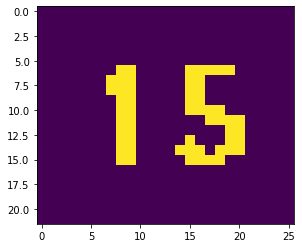

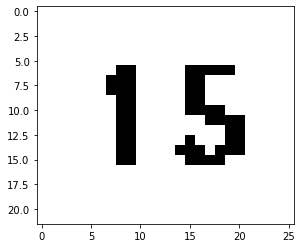

15



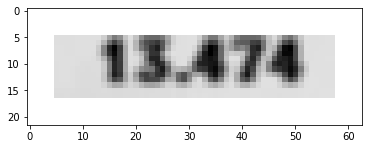

1374



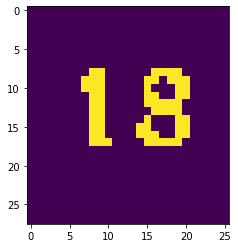

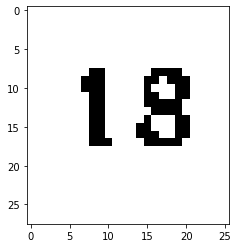

18



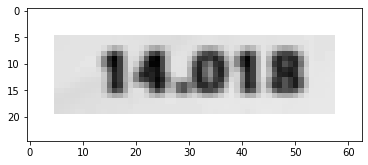

14018



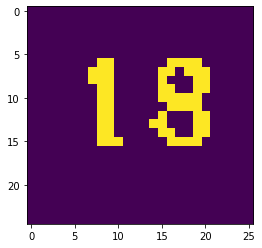

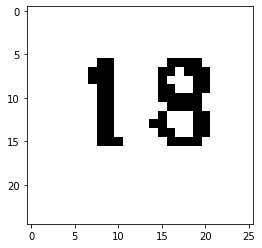

18



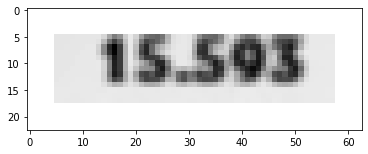

15593



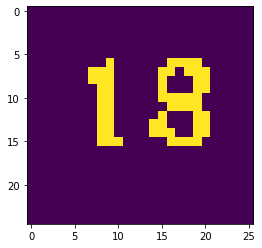

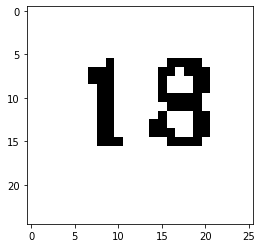

18



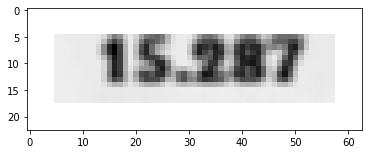

15287



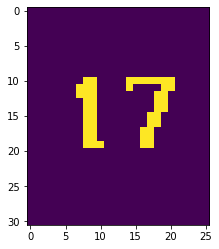

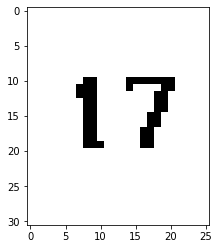

17



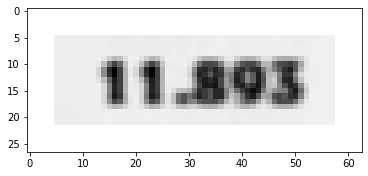

11893



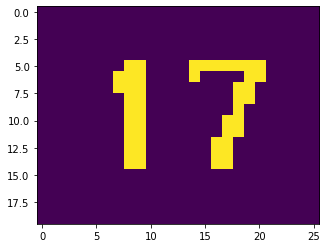

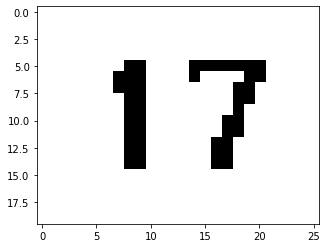

17



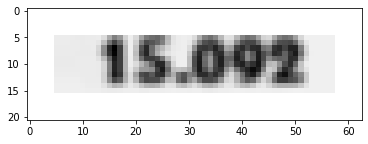

15092



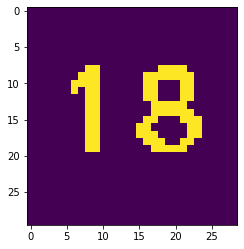

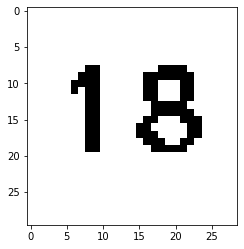

18



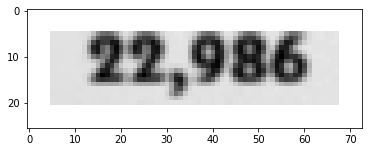

22986



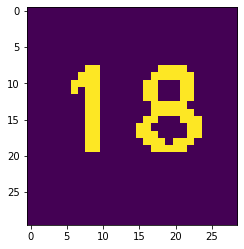

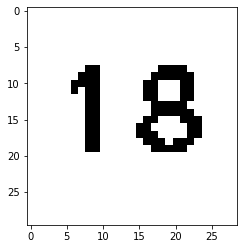

18



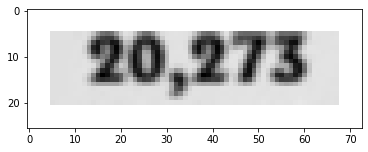

20273



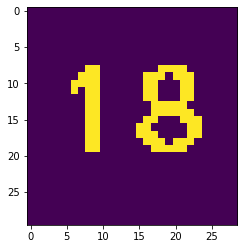

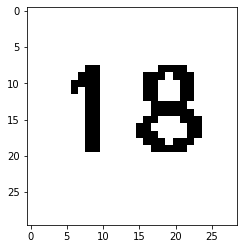

18



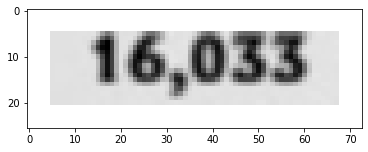

16033



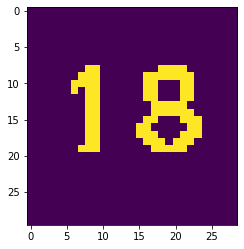

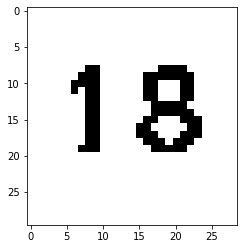

18



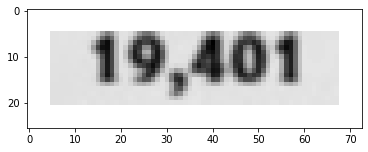

19401



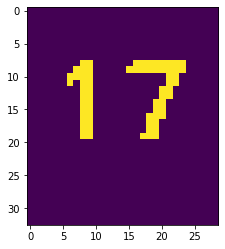

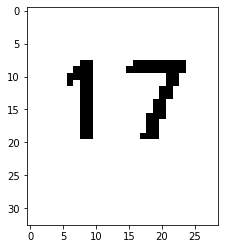

17



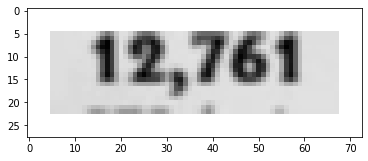

12761



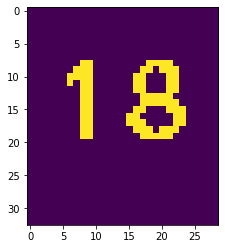

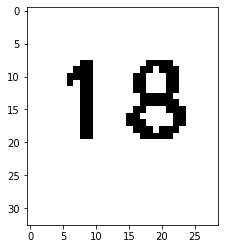

18



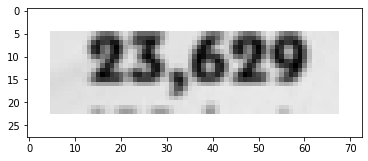

23629



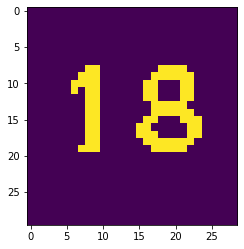

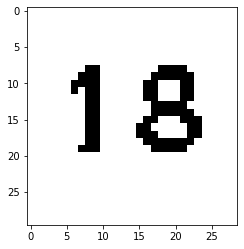

18



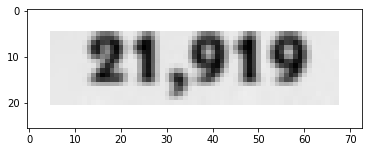

21919



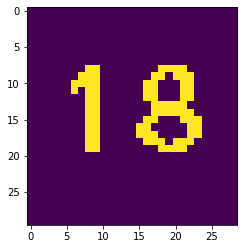

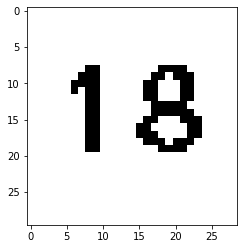

18



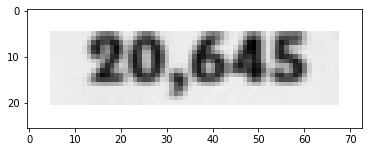

20645



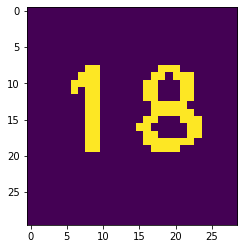

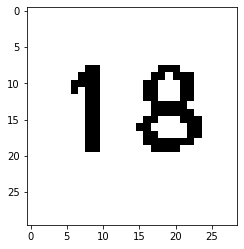

18



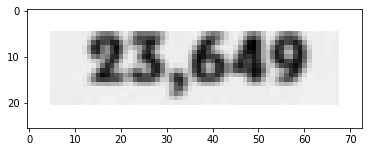

23649



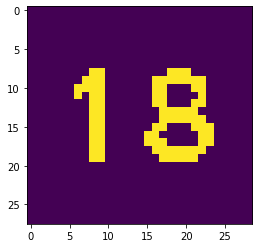

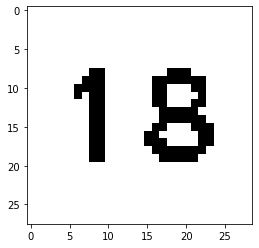

18



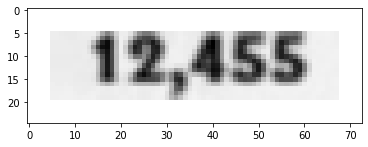

12455



In [151]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os import walk, remove
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

%matplotlib inline

files = next(walk('./input'), (None, None, []))[2]  # [] if no file
outputFiles = next(walk('./output'), (None, None, []))[2]  # [] if no file
for outputFile in outputFiles:
    remove('./output/' + outputFile)


def filterFunction(cnt, image):
    x, y, w, h = cv2.boundingRect(cnt)
    if h > (image.shape[0] / 2) and w < (image.shape[1] / 5) and x > (3 * image.shape[1] / 4):
        return True
    return False

def filterFunction2(cnt, image):
    x, y, w, h = cv2.boundingRect(cnt)
    if h > (image.shape[0] / 30):
        return True
    return False

def readText(image):
    image = 255 - image
    imgplot = plt.imshow(image, cmap='gray')
    plt.show()
    data = pytesseract.image_to_string(image, lang='eng', config='--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789')
    return data

def readText2(image):
    # image = 255 - image
    # imgplot = plt.imshow(image, cmap='gray')
    # plt.show()
    data = pytesseract.image_to_string(image, lang='eng', config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
    return data


def getLvlCoords(imgs):
    lvlCoords = []
    for img in imgs:
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        image_enhanced = cv2.equalizeHist(img_gray)
        thresh = 225
        im_bw = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_BINARY)[1]
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
        dilate = cv2.dilate(im_bw, kernel, iterations=3)
        
        cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        cnts = filter(lambda item: cv2.contourArea(item) > 300, cnts)
        cnts = sorted(cnts, key=lambda item1: item1[0][0][0])

        if(len(cnts) > 2):
            for i in range(0, 2):
                x, y, w, h = cv2.boundingRect(cnts[i])
                x2, y2, w2, h2 = cv2.boundingRect(cnts[i + 1])
                if(x2 - (x + w) > 50):
                    break
                    
        elif(len(cnts) == 1):
            x, y, w, h = cv2.boundingRect(cnts[0])


        else:
            continue
        
        if(x > img.shape[1] / 7):
            continue
        
        if((w / h) > 1.25):
            x = int((x + w) - h * 1.25)
            w = int(h * 1.25)

            
        lvlCoords.append([x, y, w, h])
        
    i = 0
    lvlCoords2 = []
    for x, y, w, h in lvlCoords:
        for y in range(i + 1, len(lvlCoords)):
            x2, y2, w2, h2 = lvlCoords[y]
            if(abs((x + w) - (x2 + w2)) < 30):
                lvlCoords2.append([x, y, w, h])
                break
        i += 1
    x, y, w, h = 0, 0, 0, 0
    for x2, y2, w2, h2 in lvlCoords2:
        x += x2
        y += y2
        w += w2
        h += h2
                                     
    if(len(lvlCoords2) != 0):
        x /= len(lvlCoords2)
        y /= len(lvlCoords2)
        w /= len(lvlCoords2)
        h /= len(lvlCoords2)
        
    
    return int(x), int(y), int(w), int(h)


def getUsernameCoords(imgs, x_lvl):
    lvlCoords = []
    for img in imgs:
        img = img[:, x_lvl:]
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        image_enhanced = cv2.equalizeHist(img_gray)
        thresh = 225
        im_bw = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_BINARY)[1]
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
        dilate = cv2.dilate(im_bw, kernel, iterations=3)
        
        cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        cnts = filter(lambda item: cv2.contourArea(item) > 300, cnts)
        cnts = sorted(cnts, key=lambda item1: item1[0][0][0])

        if(len(cnts) > 2):
            for i in range(0, 2):
                x, y, w, h = cv2.boundingRect(cnts[i])
                x2, y2, w2, h2 = cv2.boundingRect(cnts[i + 1])
                if(x2 - (x + w) > 50):
                    break
                    
        elif(len(cnts) == 1):
            x, y, w, h = cv2.boundingRect(cnts[0])


        else:
            continue
        
        if(x > img.shape[1] / 3):
            continue
            
        lvlCoords.append([x, y, w, h])
    i = 0
    lvlCoords2 = []
    for x, y, w, h in lvlCoords:
        for y in range(i + 1, len(lvlCoords)):
            x2, y2, w2, h2 = lvlCoords[y]
            if(abs(x - x2) < 30):
                lvlCoords2.append([x, y, w, h])
                break
        i += 1
    x, y, w, h = 0, 0, 0, 0
    for x2, y2, w2, h2 in lvlCoords2:
        x += x2
        y += y2
        w = w2 if w2 > w else w
        h += h2
                                     
    if(len(lvlCoords2) != 0):
        x /= len(lvlCoords2)
        y /= len(lvlCoords2)
        h /= len(lvlCoords2)
        
    
    return int(x), int(y), int(w), int(h)

def getGoldCoords(imgs):
    lvlCoords = []
    for img in imgs:
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        image_enhanced = cv2.equalizeHist(img_gray)
        thresh = 225
        im_bw = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_BINARY)[1]
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
        dilate = cv2.dilate(im_bw, kernel, iterations=3)
        
        cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        cnts = filter(lambda item: cv2.contourArea(item) > 300, cnts)
        cnts = sorted(cnts, key=lambda item1: item1[0][0][0], reverse=True)

        if(len(cnts) > 1):
            x, y, w, h = cv2.boundingRect(cnts[0])


        else:
            continue
        
        if(x < 3 * img.shape[1] / 4):
            continue
            
        lvlCoords.append([x, y, w, h])
        
    i = 0
    lvlCoords2 = []
    for x, y, w, h in lvlCoords:
        for y in range(i + 1, len(lvlCoords)):
            x2, y2, w2, h2 = lvlCoords[y]
            if(abs((x + w) - (x2 + w2)) < 30):
                lvlCoords2.append([x, y, w, h])
                break
        i += 1
    x, y, w, h = 0, 0, 0, 0
    for x2, y2, w2, h2 in lvlCoords2:
        x = x2 if x2 > x else x
        w = w2 if w2 > w else w
                                         
    return int(x), int(y), int(w), int(h)


def getDmgCoords(imgs, x_gold):
    lvlCoords = []
    for img in imgs:
        img = img[:, :x_gold]
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        image_enhanced = cv2.equalizeHist(img_gray)
        thresh = 225
        im_bw = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_BINARY)[1]
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
        dilate = cv2.dilate(im_bw, kernel, iterations=3)
        
        cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        cnts = filter(lambda item: cv2.contourArea(item) > 300, cnts)
        cnts = sorted(cnts, key=lambda item1: item1[0][0][0], reverse=True)

        if(len(cnts) > 1):
            x, y, w, h = cv2.boundingRect(cnts[0])


        else:
            continue
        
        if(x < 3 * img.shape[1] / 4):
            continue
            
        lvlCoords.append([x, y, w, h])
        
    i = 0
    lvlCoords2 = []
    for x, y, w, h in lvlCoords:
        for y in range(i + 1, len(lvlCoords)):
            x2, y2, w2, h2 = lvlCoords[y]
            if(abs((x + w) - (x2 + w2)) < 30):
                lvlCoords2.append([x, y, w, h])
                break
        i += 1
    x, y, w, h = 0, 0, 0, 0
    for x2, y2, w2, h2 in lvlCoords2:
        x = x2 if x2 > x else x
        w = w2 if w2 > w else w
                                         
    return int(x), int(y), int(w), int(h)


for path in files:
    image = cv2.imread(f'./input/{path}')
    # cv2.imwrite(f"./output/{path.split('.')[0]}.png", image)  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    im_gray = cv2.imread(f'./input/{path}', cv2.IMREAD_GRAYSCALE)
    image_enhanced = cv2.equalizeHist(im_gray)
    thresh = 200
    im_bw = cv2.threshold(image_enhanced, thresh, 255, cv2.THRESH_BINARY)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
    dilate = cv2.dilate(im_bw, kernel, iterations=25)
    # cv2.imwrite(f"./output/{path.split('.')[0]}_dilatedY.png", dilate) 

    # troba la linea vermella de la esquerra per poder retallar
    lower_red = np.array([170,50,50])
    upper_red = np.array([360,250,250])
    img_hsl = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(img_hsl, lower_red, upper_red)
    res = cv2.bitwise_and(img_hsl,img_hsl, mask = mask)
    # Detect horizontal lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,25))
    detect_vertical = cv2.morphologyEx(mask, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    # sort by lenght
    cnts = filter(lambda item: cv2.contourArea(item) > 100, cnts)
    cnts = sorted(cnts, key=lambda item1: item1[0][0][0])
    x, y, w, h = cv2.boundingRect(cnts[0])
    image = image[:, x + w:]
    # cv2.imwrite(f"./output/{path.split('.')[0]}_mask.png", image) 

    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = filter(lambda item: filterFunction(item, im_bw), cnts)
    cnts = sorted(cnts, key=lambda item1: item1[0][0][0], reverse=True)
    if(len(cnts) > 0):
        x, y, w, h = cv2.boundingRect(cnts[0])
        # cv2.imwrite(f"./output/{path.split('.')[0]}_cropped.png", image[:, 0:x - 10])
        image = image[:, 0:x - 10] #image without friend list
        im_gray = im_gray[:, 0:x - 10]
        image_enhanced = cv2.equalizeHist(im_gray)
    
    thresh = 250
    im_bw = cv2.threshold(image_enhanced, thresh, 255, cv2.THRESH_BINARY)[1]

    # cv2.imwrite(f"./output/{path.split('.')[0]}_black.png", im_bw) 
    # image ja no te la part dels amics, ara treurem la part de dalt i baix

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
    dilate = cv2.dilate(im_bw, kernel, iterations=100)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
    dilate = cv2.dilate(dilate, kernel, iterations=1)
    # cv2.imwrite(f"./output/{path.split('.')[0]}_dilatedH.png", dilate)  

    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = filter(lambda item: filterFunction2(item, im_bw), cnts)
    cnts = sorted(cnts, key=lambda item1: item1[0][0][1])
    # for cnt in cnts:
    #     cv2.drawContours(image, [cnt], 0, (255,255,0), 3)
    # cv2.imwrite(f"./output/{path.split('.')[0]}_cnts.png", image)  

    top = None
    bottom = None
    if(len(cnts) > 0):
        foundTop = False
        foundBottom = False
        cnts2 = cnts[:]
        victoryImg = None
        while not foundTop:
            x, y, w, h = cv2.boundingRect(cnts2[0])
            x2, y2, w2, h2 = cv2.boundingRect(cnts2[1])
            if(y2 - (y + h) > image.shape[0] / 20):
                victoryImg = image[0:y + h, :]
                # cv2.imwrite(f"./output/{path.split('.')[0]}_victory.png", victoryImg)
                top = y2
                foundTop = True
            elif(y > image.shape[0] / 10): 
                top = y
                foundTop = True
            else:
                cnts2.pop(0)
            if(len(cnts2) < 2):
                top = 0
                foundTop = True

        cnts2 = cnts[:]
        while not foundBottom:
            x, y, w, h = cv2.boundingRect(cnts2[-1])
            x2, y2, w2, h2 = cv2.boundingRect(cnts2[-2])
            if(y - (y2 + h2) > image.shape[0] / 20):
                bottom = y2 + h2
                foundBottom = True
            elif(y > image.shape[0] / 2):
                bottom = y + h
                foundBottom = True
            else:
                cnts2.pop(-1)
            if(len(cnts2) < 2):
                bottom = image.shape[0]
                foundBottom = True
        
        image = image[top:bottom, :]
        im_gray = im_gray[top:bottom, :]
        # cv2.imwrite(f"./output/{path.split('.')[0]}_final_cropped.png", image)

        # LA IMATGE JA ESTÀ RETALLADA I NOMES HI HA LA INFO UTIL (a vegades es queden els amics, retallarem la imatge amb un format estandard)
        height = image.shape[0]
        width = image.shape[1]
        if(width / height > 2.25):
            image = image[:, 0: int(2.25 * height)]
            im_gray = im_gray[:, 0: int(2.25 * height)]
        # cv2.imwrite(f"./output/{path.split('.')[0]}_final_cropped.png", image)
        image_enhanced = cv2.equalizeHist(im_gray)
        thresh = 250
        im_bw = cv2.threshold(image_enhanced, thresh, 255, cv2.THRESH_BINARY)[1]
        # cv2.imwrite(f"./output/{path.split('.')[0]}_black2.png", im_bw)


        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
        dilate = cv2.dilate(im_bw, kernel, iterations=100)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
        dilate = cv2.dilate(dilate, kernel, iterations=1)

        cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        cnts = filter(lambda item: filterFunction2(item, im_bw), cnts)
        cnts = sorted(cnts, key=lambda item1: item1[0][0][1])
        # for cnt in cnts:
        #     cv2.drawContours(image, [cnt], 0, (255,255,0), 3)
        # cv2.imwrite(f"./output/{path.split('.')[0]}_cnts.png", image) 

        imgs = []
        if(len(cnts) == 10):
            for cnt in cnts:
                x, y, w, h = cv2.boundingRect(cnt)
                imgs.append(image[y:y + h + 5, :])
        else:
            x, y, w, h = cv2.boundingRect(cnts[0])
            x2, y2, w2, h2 = cv2.boundingRect(cnts[-1])

            i = 0
            maxSeparation = 0
            cntTop = None
            cntBottom = None
            for i in range(0, len(cnts) - 1):
                x3, y3, w3, h3 = cv2.boundingRect(cnts[i])
                x4, y4, w4, h4 = cv2.boundingRect(cnts[i + 1])
                if(y4 - (y3 + h3) > maxSeparation):
                    maxSeparation = y4 - (y3 + h3)
                    cntTop = cnts[i]
                    cntBottom = cnts[i + 1]
                

            if(cntTop is not None and cntBottom is not None):
                x4, y4, w4, h4 = cv2.boundingRect(cntBottom)
                height = (y2 + h2 - y4) / 5 + 3
                for i in range(0, 10):
                    y5 = y2 - height * i
                    if(i > 4):
                        y5 -= maxSeparation / 2
                    imgs.append(image[int(y5):int(y5 + height), :])
                    imgs.reverse()

        i = 0

        x, y, w, h = getLvlCoords(imgs)
        x2, y2, w2, h2 = getUsernameCoords(imgs, x + w)
        x2 += (x + w)
        x3, y3, w3, h3 = getGoldCoords(imgs)
        x4, y4, w4, h4 = getDmgCoords(imgs, x3 - 5)
        x5, y5, w5, h5 = getDmgCoords(imgs, x4 - 5)


        for img in imgs:
                
            # for cnt in cnts:
                #draw contour
                # cv2.drawContours(img, [cnt], 0, (255,255,0), 3)
            # cv2.imwrite(f"./output/{path.split('.')[0]}_level.png", img)
            lvl = img[:, x:x+w] 
            img_gray = cv2.cvtColor(lvl, cv2.COLOR_RGB2GRAY)
            thresh = 200
            im_bw = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_BINARY)[1]
            

            #print(f'{readText(lvl)} - {path.split(".")[0]}')
            #cv2.imwrite(f"/kaggle/working/{path.split('.')[0]}_level.png", lvl)
            imgplot = plt.imshow(im_bw)
            plt.show()
            print(readText(im_bw))
            
            
            # username = img_gray[:, x2:x2+w2]
            # imgplot = plt.imshow(username)
            # plt.show()
            # print(readText(username))

            gold = img[0:int(img.shape[0] * 0.55), (x3 - 5):(x3 + w3)]
            gold_gray=cv2.cvtColor(gold,cv2.COLOR_RGB2GRAY)            
            thresh = cv2.GaussianBlur(gold_gray, (3, 3), 0)

            out_binary=cv2.threshold(thresh,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

            img2 = cv2.copyMakeBorder(thresh, 5,5,5,5, borderType=cv2.BORDER_CONSTANT, value=0)
            img2 = 255 - img2

           
            imgplot = plt.imshow(img2, cmap='gray')
            plt.show()
            print(readText2(img2))

            # dmg = img_gray[0:int(img.shape[0] * 0.55), (x4 - 5):(x4 + w4)]
            # imgplot = plt.imshow(dmg)
            # plt.show()
            # print(readText(dmg))

            # kda = img_gray[0:int(img.shape[0] * 0.55), (x5 - 5):(x5 + w5)]
            # imgplot = plt.imshow(kda)
            # plt.show()
            # print(readText(kda))





        